In [1]:
"""
@author: Nicolò Perello
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
from evaluate_model import evaluate_model, build_params
from plot_analysis import plot_gof, matrix_TS, plot_points, plot_time_series

# **ISR Dataset**

## No-rain sampling

In [2]:
# CALIBRATED PARAMETERS
X_norain = np.load('data_calibration/ISR_dataset/ISR_no_rain/no_rain_calib.npz')['params']
params_norain = build_params(x=X_norain, type_ts='no_rain')
params_norain

{'A1': np.float64(0.5927894230376204),
 'A2': 0.555,
 'A3': 10.6,
 'A4': 0.5022,
 'A5': 0.0133,
 'Bd1': np.float64(0.11275636149475457),
 'Bd2': np.float64(0.34981970579089056),
 'Bd3': np.float64(0.11105537890515277),
 'Cd1': np.float64(0.5314707152759303),
 'Cd2': np.float64(0.5344001059799594),
 'Cd3': np.float64(0.5177284089999897),
 'Bw1': np.float64(0.10436259734785491),
 'Bw2': np.float64(0.48295449247362854),
 'Bw3': np.float64(0.10006082472140096),
 'Cw1': np.float64(0.5098566245546007),
 'Cw2': np.float64(0.6789002755318204),
 'Cw3': np.float64(0.5048708663988907)}

In [3]:
# LOAD DATA
df_TS_norain_calib = pd.read_pickle('data_calibration/ISR_dataset/ISR_no_rain/TS_calibration.pkl')
df_TS_norain_valid = pd.read_pickle('data_calibration/ISR_dataset/ISR_no_rain/TS_validation.pkl')
df_TS_norain = pd.concat([df_TS_norain_calib, df_TS_norain_valid], axis=0)
df_TS_norain.head()

month                                               time  \
id                                                            
0      8  0     2017-08-31 13:00:00
1     2017-08-31 14:...   
1     12  0     2019-12-15 18:00:00
1     2019-12-15 19:...   
2     11  0     2019-11-02 12:00:00
1     2019-11-02 13:...   
3      5  0     2017-05-22 13:00:00
1     2017-05-22 14:...   
4      5  0     2017-05-09 13:00:00
1     2017-05-09 14:...   

                                                 Rain  \
id                                                      
0   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
1   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
2   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
3   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
4   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   

                                                 Temp  \
id                                                      
0   0      32.1
1      31.9
2      31.5
3      30....   
1   0      12.3
1      12.3
2      12.5
3      12....   
2   0      16.9
1      17.3
2      17.6
3      17....   
3   0      27.9
1      27.2
2      26.8
3      27....   
4   0      33.3
1      34.0
2      34.2
3      34....   

                                               Wspeed  \
id                                                      
0   0      3.8
1      4.9
2      4.7
3      4.5
4 ...   
1   0      2.4
1      3.4
2      2.0
3      1.6
4 ...   
2   0      3.8
1      3.6
2      3.9
3      3.9
4 ...   
3   0      2.1
1      3.1
2      1.9
3      1.8
4 ...   
4   0      3.0
1      3.0
2      2.7
3      2.3
4 ...   

                                                  Hum  \
id                                                      
0   0      41.0
1      42.0
2      44.0
3      46....   
1   0      70.0
1      65.0
2      62.0
3      67....   
2   0      78.0
1      78.0
2      70.0
3      74....   
3   0      23.0
1      30.0
2      29.0
3      28....   
4   0      11.0
1      11.0
2      11.0
3      11....   

                                                 DFMC  
id                                                     
0   0      7.578558
1      7.407407
2      7.32159...  
1   0      10.152740
1      10.152740
2      10.15...  
2   0      15.182358
1      14.310197
2      13.64...  
3   0      5.392621
1      5.303030
2      4.48901...  
4   0      3.381643
1      3.288201
2      3.19457...

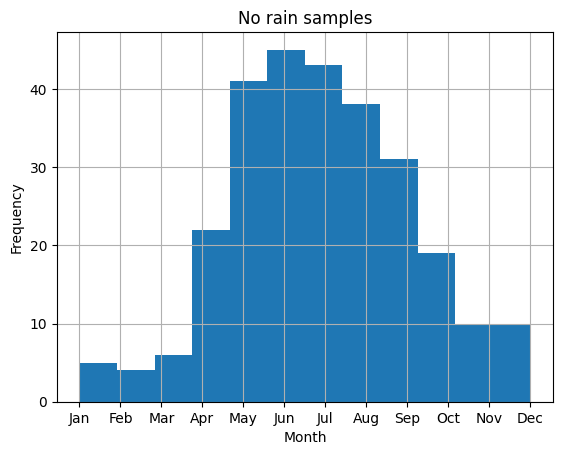

In [4]:
# distribution of month
fig, ax = plt.subplots() 
df_TS_norain.month.plot.hist(bins=12, ax=ax)
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid()
ax.set_title('No rain samples')
plt.show()

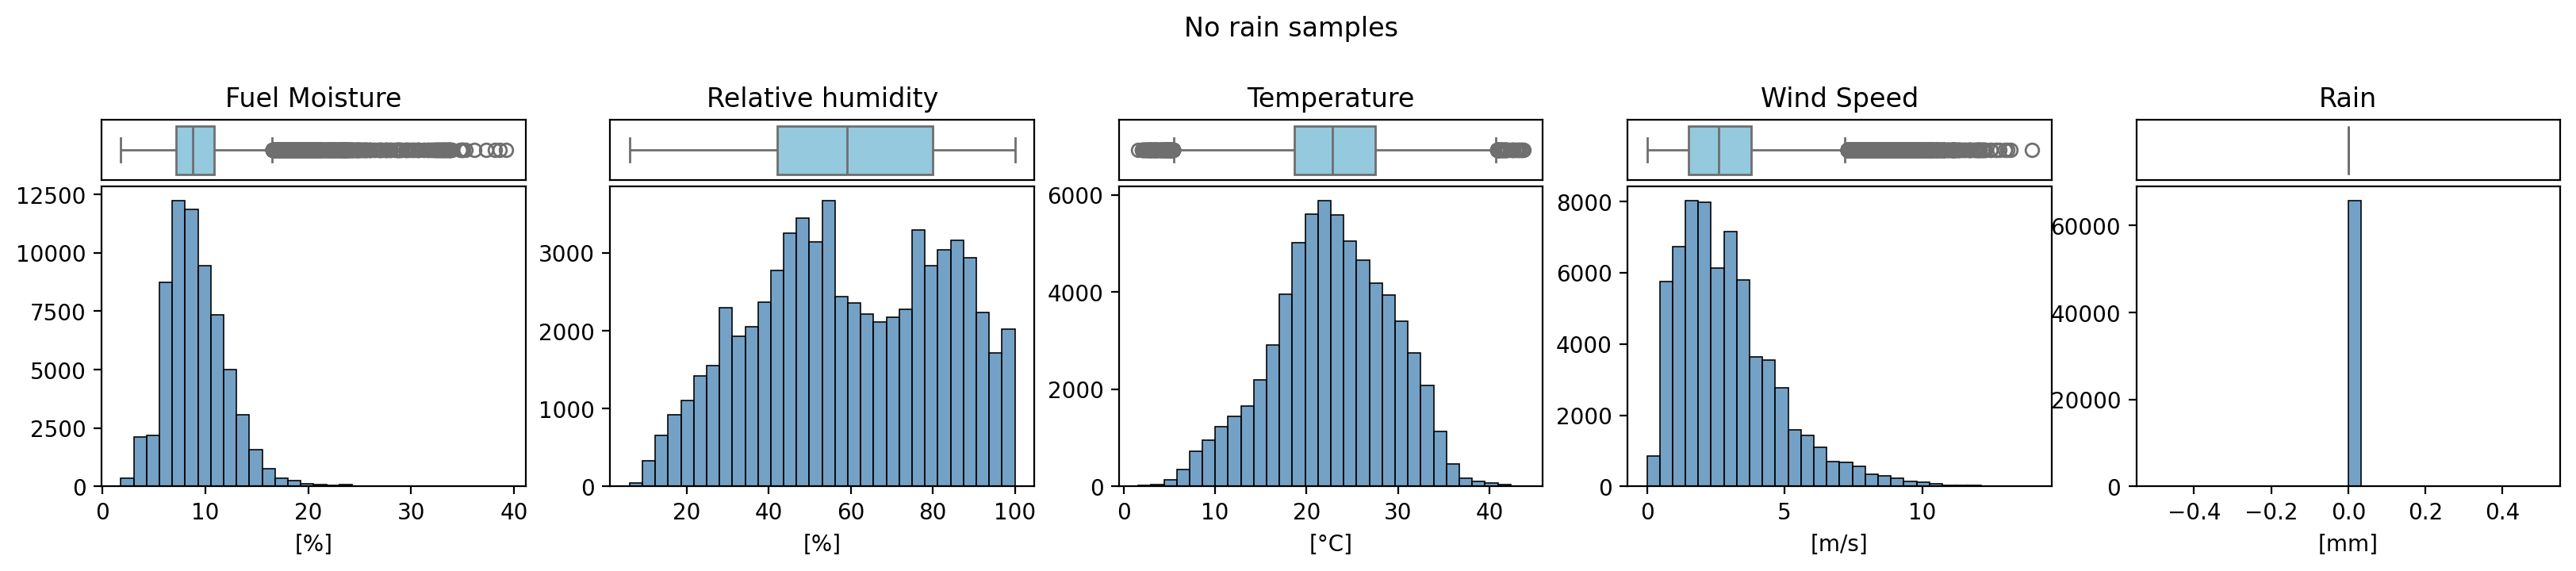

mean        std       min        max
DFMC     9.172178   3.101561  1.768173  39.246659
Hum     59.751886  22.797623       6.0      100.0
Temp    22.788469   6.423459       1.6       43.7
Wspeed     2.9242   1.833828       0.0       14.0
Rain          0.0        0.0       0.0        0.0

In [5]:
# Pot distribution of data

variables = ['DFMC', 'Hum', 'Temp', 'Wspeed', 'Rain']
vars_name = ['Fuel Moisture', 'Relative humidity', 'Temperature', 'Wind Speed', 'Rain']
vars_um = ['%', '%', '°C', 'm/s', 'mm']

num_vars = len(variables)
fig, axs = plt.subplots(1, num_vars,
                       figsize=(num_vars*4, 3),
                       dpi=200)

df_stats = pd.DataFrame(index=variables, columns=['mean', 'std', 'min', 'max'])
for i, var in enumerate(variables):
    df_plot = pd.concat([df_TS_norain.iloc[x][var] for x in range(len(df_TS_norain))])
    df_stats.loc[var] = [df_plot.mean(), df_plot.std(), df_plot.min(), df_plot.max()]
    ax = axs[i]
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes('top', size='20%', pad='2%')

    sns.boxplot(df_plot, ax=cax, color='skyblue', orient='h')
    sns.histplot(df_plot, ax=ax, bins=30, kde=False, color='steelblue')

    cax.set(xlabel='', ylabel='', yticks=[], xticks=[], title=vars_name[i])
    ax.set(xlabel=f'[{vars_um[i]}]', ylabel='')
fig.suptitle('No rain samples', y=1.1)
plt.show()
df_stats

In [6]:
# EVALUATE MODEL
df_TS_gof_norain = evaluate_model(X=X_norain, df_TS=df_TS_norain_valid, type_ts='no_rain')

In [7]:
# GoF statistics

metrics = ['MAE', 'BIAS', 'RMSE', 'NNSE']
stats = ['median', 'min', 'max']

df_stats = pd.DataFrame(index=stats)
for mm in metrics:
    df_stats.loc['median', mm] = df_TS_gof_norain[mm].median()
    df_stats.loc['min', mm] = df_TS_gof_norain[mm].min()
    df_stats.loc['max', mm] = df_TS_gof_norain[mm].max()
df_stats

MAE      BIAS      RMSE      NNSE
median  1.480282 -0.199715  1.777755  0.513909
min     0.433557 -3.168716  0.532406  0.069519
max     5.048087  5.048087  5.902860  0.864054

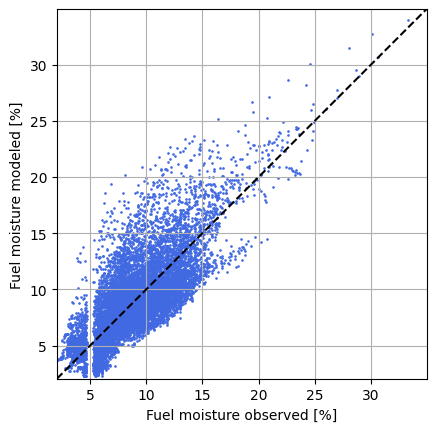

In [8]:
fig_points = plot_points(df_TS_norain_valid, df_TS_gof_norain)
plt.show()

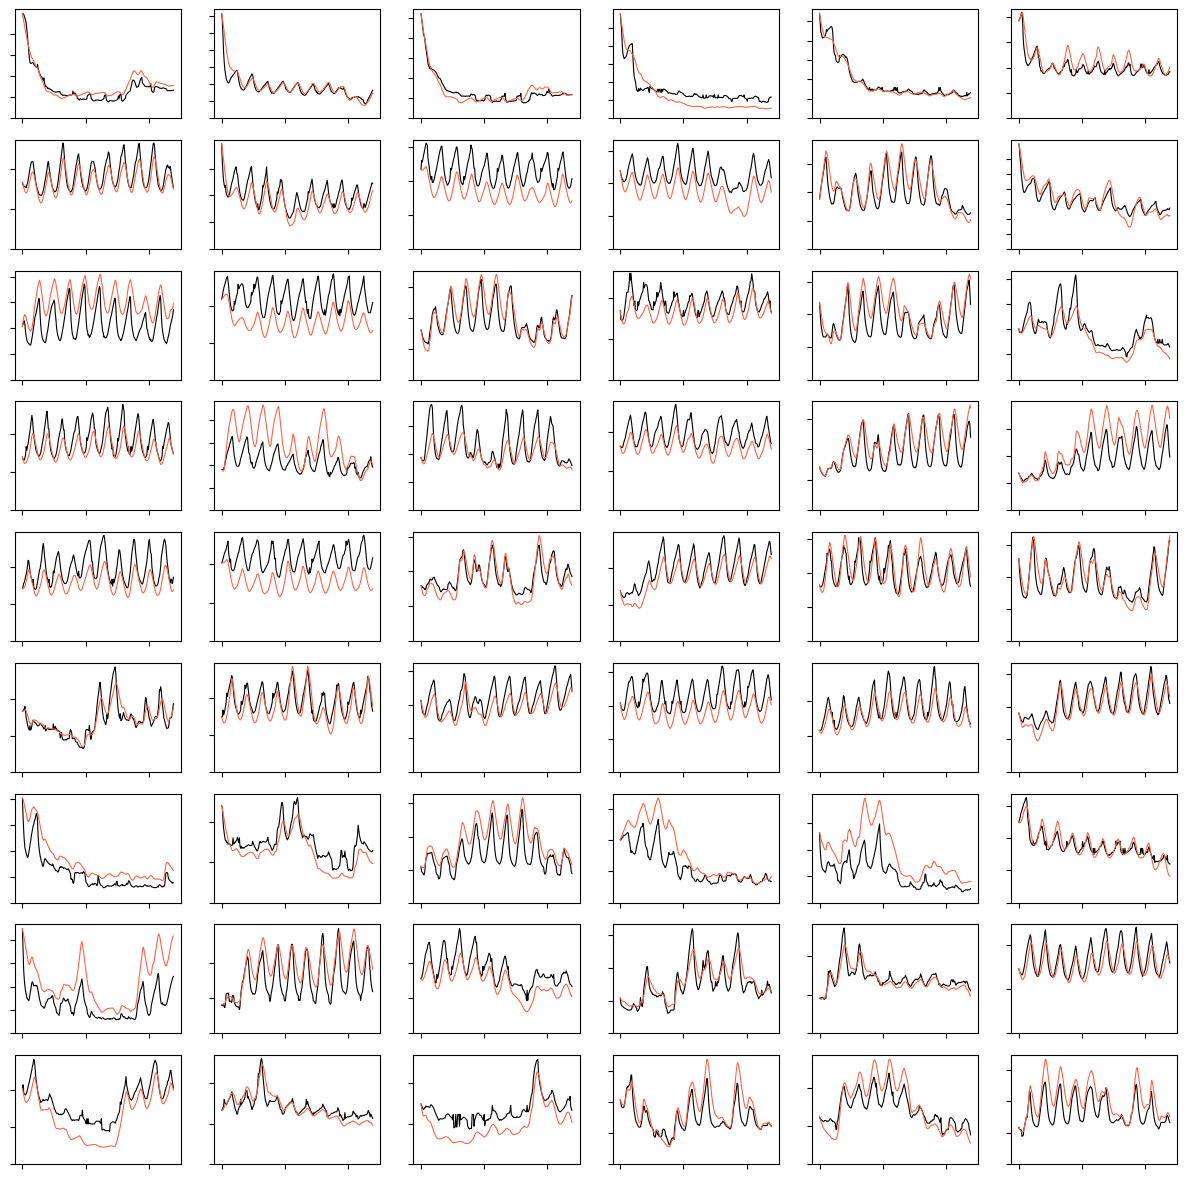

In [9]:
fig_mtx_TS = matrix_TS(df_TS_norain_valid, df_TS_gof_norain, Nrows=9, Ncols=6)
plt.show()

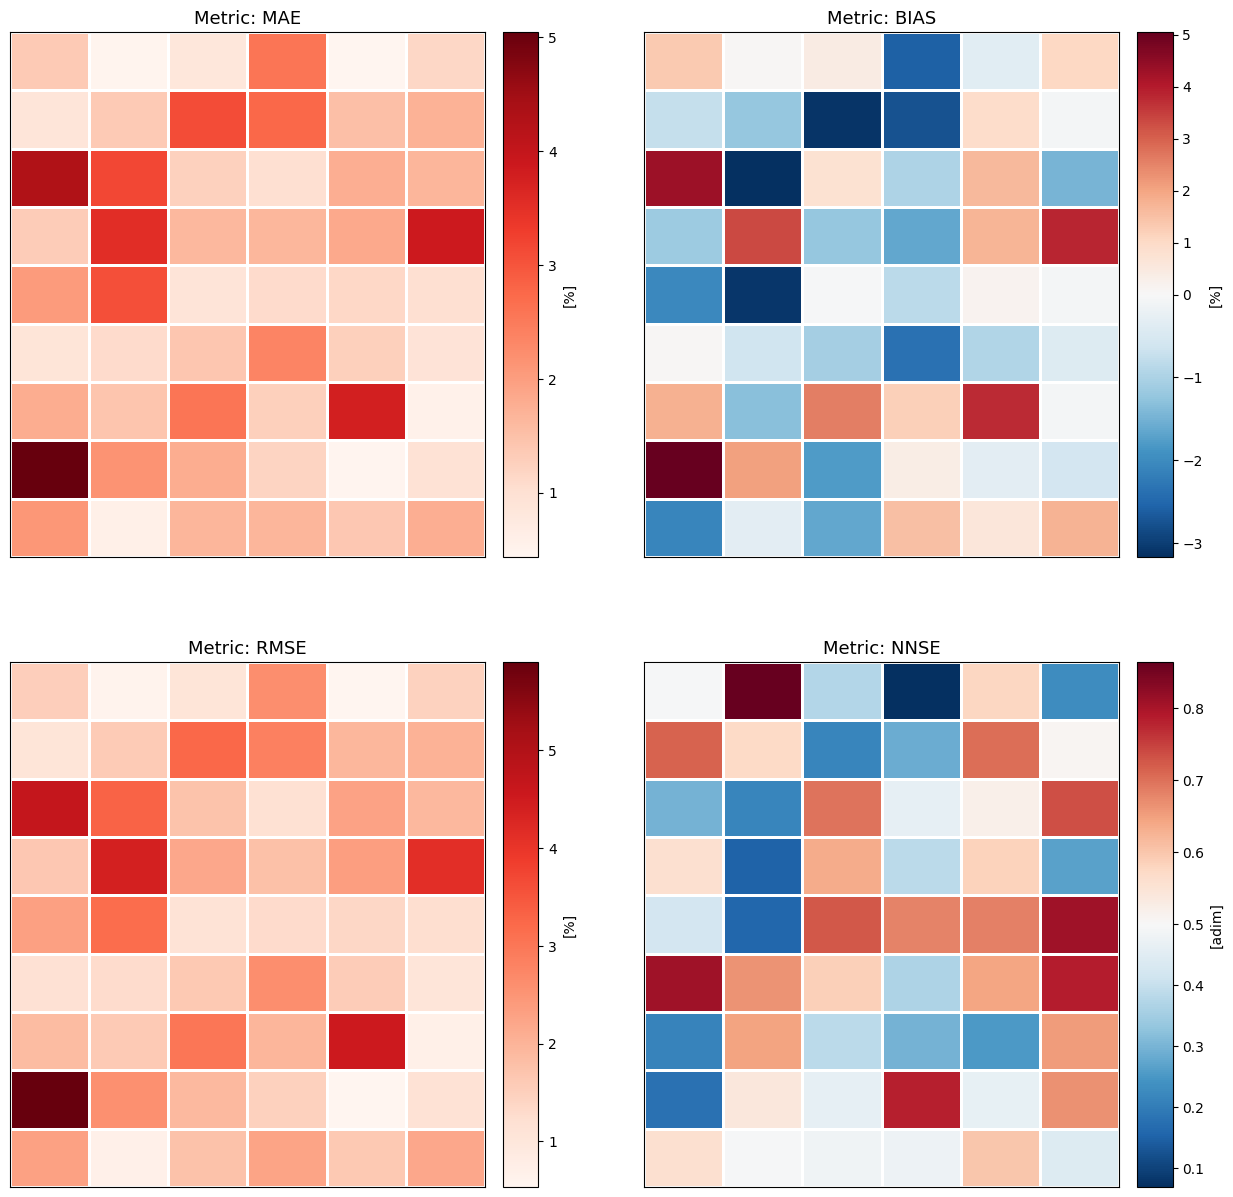

In [10]:
fig_mtx_gof = plot_gof(df_TS_gof_norain, Nrows_grid=9, Ncols_grid=6)
plt.show()

In [11]:
# Best-worst time series
min_mae = df_TS_gof_norain[df_TS_gof_norain.MAE == df_TS_gof_norain.MAE.min()].index.item()
max_mae = df_TS_gof_norain[df_TS_gof_norain.MAE == df_TS_gof_norain.MAE.max()].index.item()
print(f'    - best: {min_mae}')
print(f'    - worst: {max_mae}')

    - best: 52
    - worst: 6


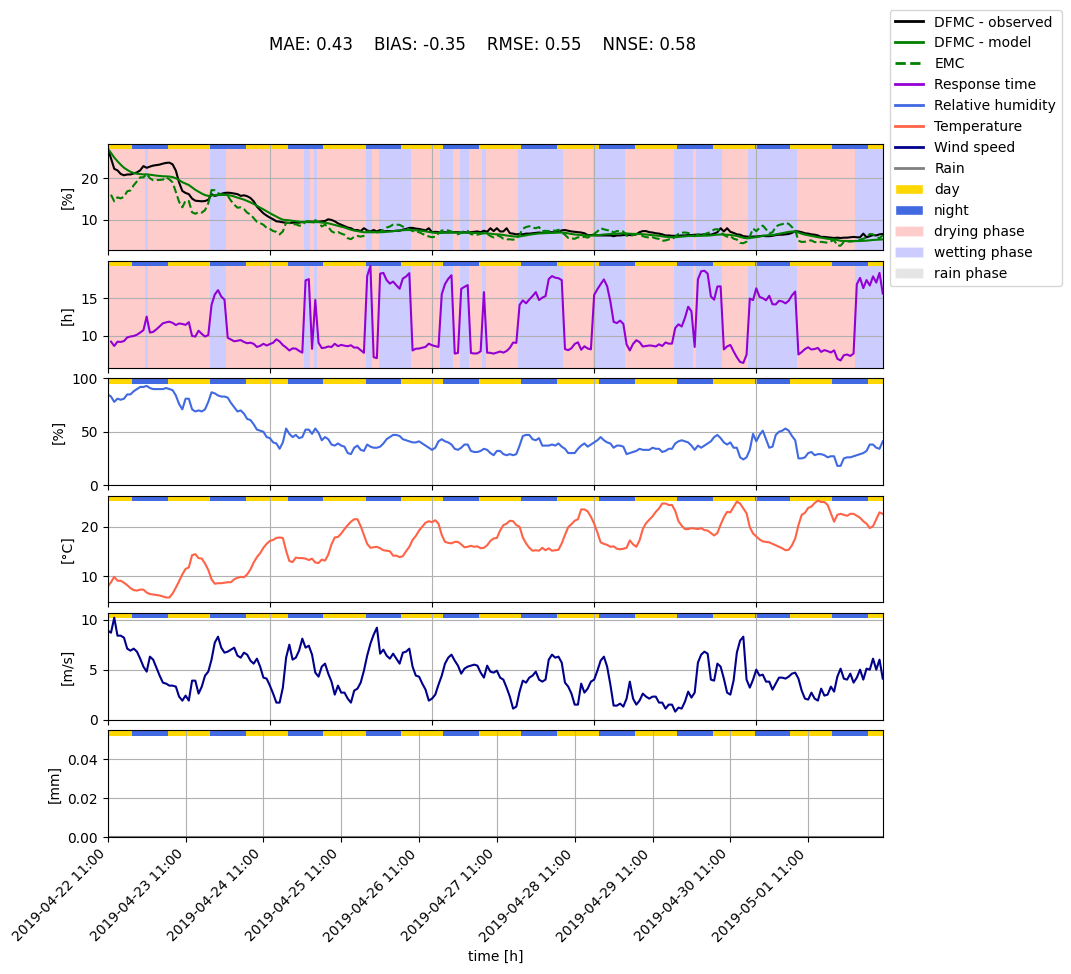

In [12]:
# Best

idx_TS = 52

mae = df_TS_gof_norain.loc[idx_TS, "MAE"]
bias = df_TS_gof_norain.loc[idx_TS, "BIAS"]
rmse = df_TS_gof_norain.loc[idx_TS, "RMSE"]
nnse = df_TS_gof_norain.loc[idx_TS, "NNSE"]

time_series = pd.concat([
    pd.concat([df_TS_norain_valid.loc[idx_TS, c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof_norain.loc[idx_TS, c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
fig_ts.suptitle(f'MAE: {mae:.2f}    BIAS: {bias:.2f}    RMSE: {rmse:.2f}    NNSE: {nnse:.2f}', y=1)
plt.show()

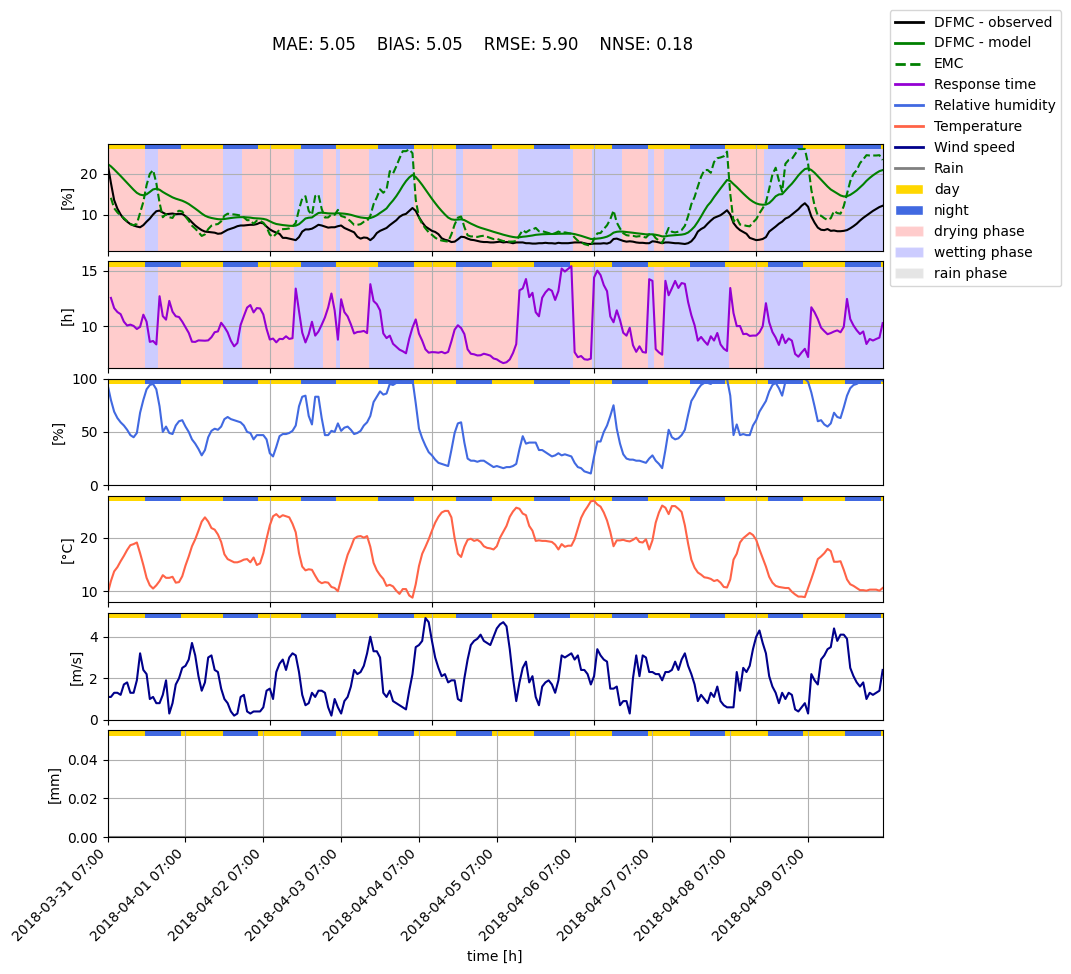

In [13]:
# Worst

idx_TS = 6

mae = df_TS_gof_norain.loc[idx_TS, "MAE"]
bias = df_TS_gof_norain.loc[idx_TS, "BIAS"]
rmse = df_TS_gof_norain.loc[idx_TS, "RMSE"]
nnse = df_TS_gof_norain.loc[idx_TS, "NNSE"]

time_series = pd.concat([
    pd.concat([df_TS_norain_valid.loc[idx_TS, c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof_norain.loc[idx_TS, c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
fig_ts.suptitle(f'MAE: {mae:.2f}    BIAS: {bias:.2f}    RMSE: {rmse:.2f}    NNSE: {nnse:.2f}', y=1)
plt.show()

## Rain sampling

In [14]:
# CALIBRATED PARAMETERS
X_rain = np.load('data_calibration/ISR_dataset/ISR_rain/rain_calib.npz')['params']
params_rain = build_params(x=X_rain, type_ts='rain')
params_rain

{'MIN_RAIN': 0,
 'R1': np.float64(68.65896380497416),
 'R2': np.float64(53.37406687890216),
 'R3': np.float64(0.9359530149554752)}

In [15]:
# LOAD DATA
df_TS_rain_calib = pd.read_pickle('data_calibration/ISR_dataset/ISR_rain/TS_calibration.pkl')
df_TS_rain_valid = pd.read_pickle('data_calibration/ISR_dataset/ISR_rain/TS_validation.pkl')
df_TS_rain = pd.concat([df_TS_rain_calib, df_TS_rain_valid], axis=0)
df_TS_rain.head()

month                                               time  \
id                                                            
0      4  0   2020-04-01 04:00:00
1   2020-04-01 05:00:0...   
1     12  0   2017-12-24 22:00:00
1   2017-12-24 23:00:0...   
2     12  0   2019-12-25 11:00:00
1   2019-12-25 12:00:0...   
3      1  0   2020-01-23 21:00:00
1   2020-01-23 22:00:0...   
4      2  0   2020-02-09 02:00:00
1   2020-02-09 03:00:0...   

                                                 Rain  \
id                                                      
0   0    2.7
1    2.4
2    0.1
3    2.8
4    2.4
5...   
1   0    0.3
1    3.1
2    3.1
3    0.8
4    1.5
5...   
2   0    2.4
1    4.7
2    5.7
3    8.7
4    2.4
5...   
3   0    0.1
1    0.4
2    3.6
3    2.1
4    2.7
5...   
4   0    0.6
1    0.3
2    0.8
3    0.3
4    1.5
5...   

                                                 Temp  \
id                                                      
0   0    9.6
1    9.3
2    9.1
3    9.3
4    9.6
5...   
1   0    12.2
1    11.7
2    11.5
3    11.3
4    1...   
2   0    7.1
1    6.1
2    6.1
3    6.1
4    6.2
5...   
3   0    5.5
1    5.6
2    6.0
3    6.1
4    6.4
5...   
4   0    4.7
1    4.8
2    4.9
3    4.9
4    4.9
5...   

                                               Wspeed  \
id                                                      
0   0     8.9
1    11.0
2    11.7
3    12.6
4    1...   
1   0    1.5
1    1.0
2    1.1
3    1.7
4    2.4
5...   
2   0    13.1
1    11.2
2    12.9
3    11.4
4    1...   
3   0     6.6
1     7.3
2     7.9
3    11.6
4    1...   
4   0    5.4
1    5.7
2    6.1
3    4.9
4    4.7
5...   

                                                  Hum  \
id                                                      
0   0    91.0
1    95.0
2    97.0
3    97.0
4    9...   
1   0    99.0
1    99.0
2    99.0
3    99.0
4    9...   
2   0    91.0
1    96.0
2    97.0
3    98.0
4    9...   
3   0    94.0
1    97.0
2    98.0
3    99.0
4    9...   
4   0    100.0
1    100.0
2    100.0
3    100.0
4 ...   

                                                 DFMC  
id                                                     
0   0    27.483684
1    30.651872
2    31.647300
3...  
1   0    32.659933
1    33.993399
2    34.210526
3...  
2   0    25.093633
1    27.693420
2    29.278642
3...  
3   0    26.900585
1    31.553730
2    33.199733
3...  
4   0    34.167215
1    34.167215
2    34.725849
3...

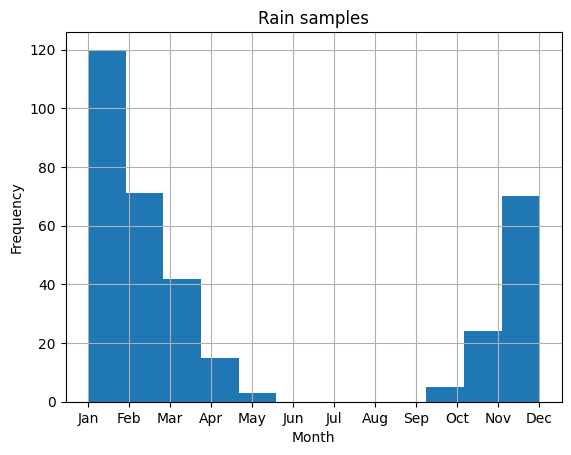

In [16]:
# Distribution of month
fig, ax = plt.subplots() 
df_TS_rain.month.plot.hist(bins=12, ax=ax)
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid()
ax.set_title('Rain samples')
plt.show()

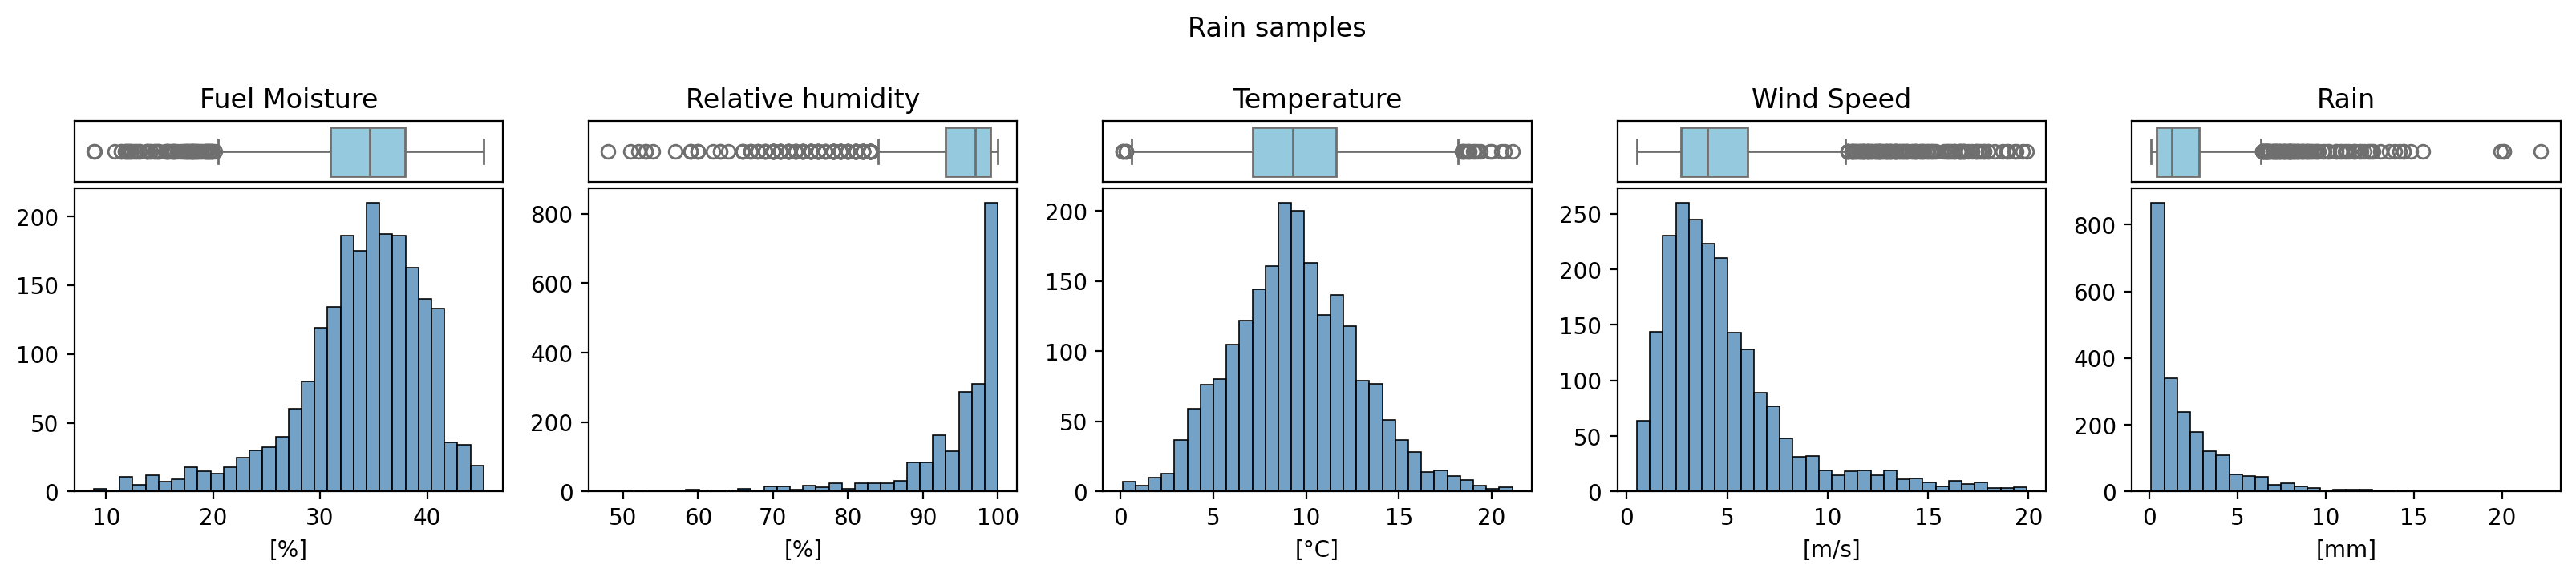

mean       std       min        max
DFMC    33.796772  6.018183  8.842297  45.265463
Hum     94.676667  7.220328      48.0      100.0
Temp     9.354714  3.346749       0.1       21.1
Wspeed   4.835333  3.273566       0.5       19.9
Rain     2.065524  2.420057       0.1       22.2

In [17]:
# Distribution of data

variables = ['DFMC', 'Hum', 'Temp', 'Wspeed', 'Rain']
vars_name = ['Fuel Moisture', 'Relative humidity', 'Temperature', 'Wind Speed', 'Rain']
vars_um = ['%', '%', '°C', 'm/s', 'mm']

num_vars = len(variables)
fig, axs = plt.subplots(1, num_vars,
                       figsize=(num_vars*4, 3),
                       dpi=200)

df_stats = pd.DataFrame(index=variables, columns=['mean', 'std', 'min', 'max'])
for i, var in enumerate(variables):
    df_plot = pd.concat([df_TS_rain.iloc[x][var] for x in range(len(df_TS_rain))])
    df_stats.loc[var] = [df_plot.mean(), df_plot.std(), df_plot.min(), df_plot.max()]

    ax = axs[i]
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes('top', size='20%', pad='2%')

    sns.boxplot(df_plot, ax=cax, color='skyblue', orient='h')
    sns.histplot(df_plot, ax=ax, bins=30, kde=False, color='steelblue')

    cax.set(xlabel='', ylabel='', yticks=[], xticks=[], title=vars_name[i])
    ax.set(xlabel=f'[{vars_um[i]}]', ylabel='')
fig.suptitle('Rain samples', y=1.1)
plt.show()
df_stats

In [18]:
# EVALUATE
df_TS_gof_rain = evaluate_model(X=X_rain, df_TS=df_TS_rain_valid, type_ts='rain')

In [19]:
# GoF statistics

metrics = ['MAE', 'BIAS', 'RMSE', 'NNSE']
stats = ['median', 'min', 'max']

df_stats = pd.DataFrame(index=stats)
for mm in metrics:
    df_stats.loc['median', mm] = df_TS_gof_rain[mm].median()
    df_stats.loc['min', mm] = df_TS_gof_rain[mm].min()
    df_stats.loc['max', mm] = df_TS_gof_rain[mm].max()
df_stats

MAE      BIAS      RMSE      NNSE
median  0.856450 -0.297113  1.061677  0.569311
min     0.180907 -4.276874  0.229431  0.157801
max     4.276874  3.221308  4.693079  0.986950

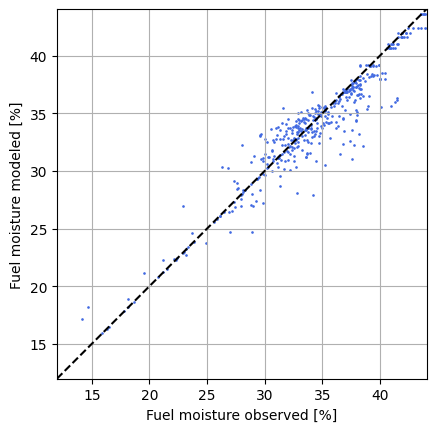

In [20]:
fig_points = plot_points(df_TS_rain_valid, df_TS_gof_rain)
plt.show()

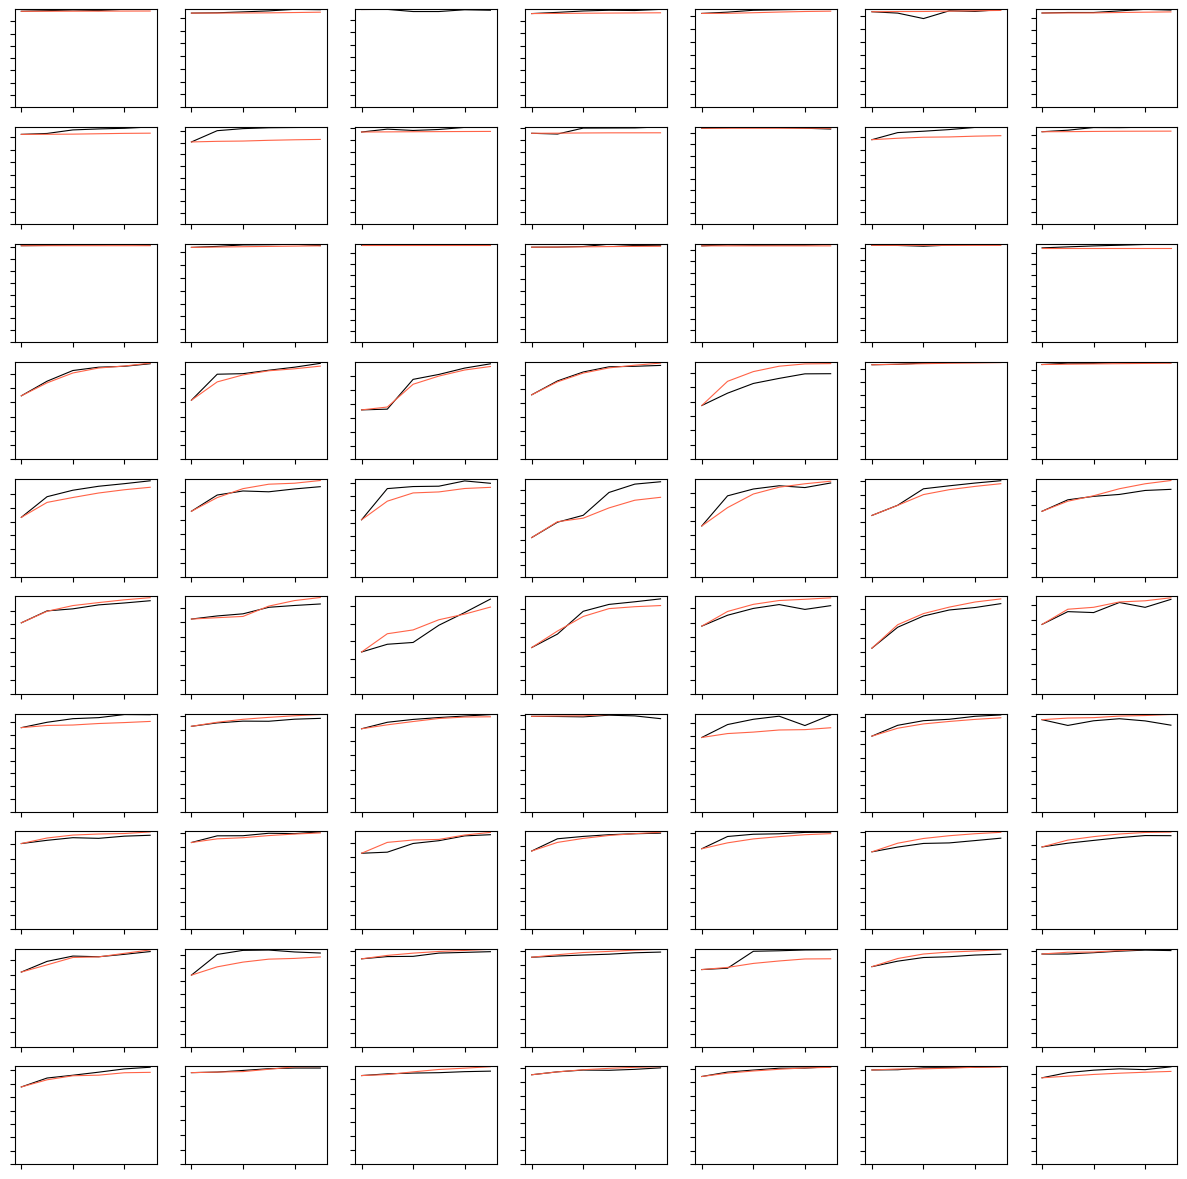

In [21]:
fig_mtx_TS = matrix_TS(df_TS_rain_valid, df_TS_gof_rain, Nrows=10, Ncols=7)
plt.show()

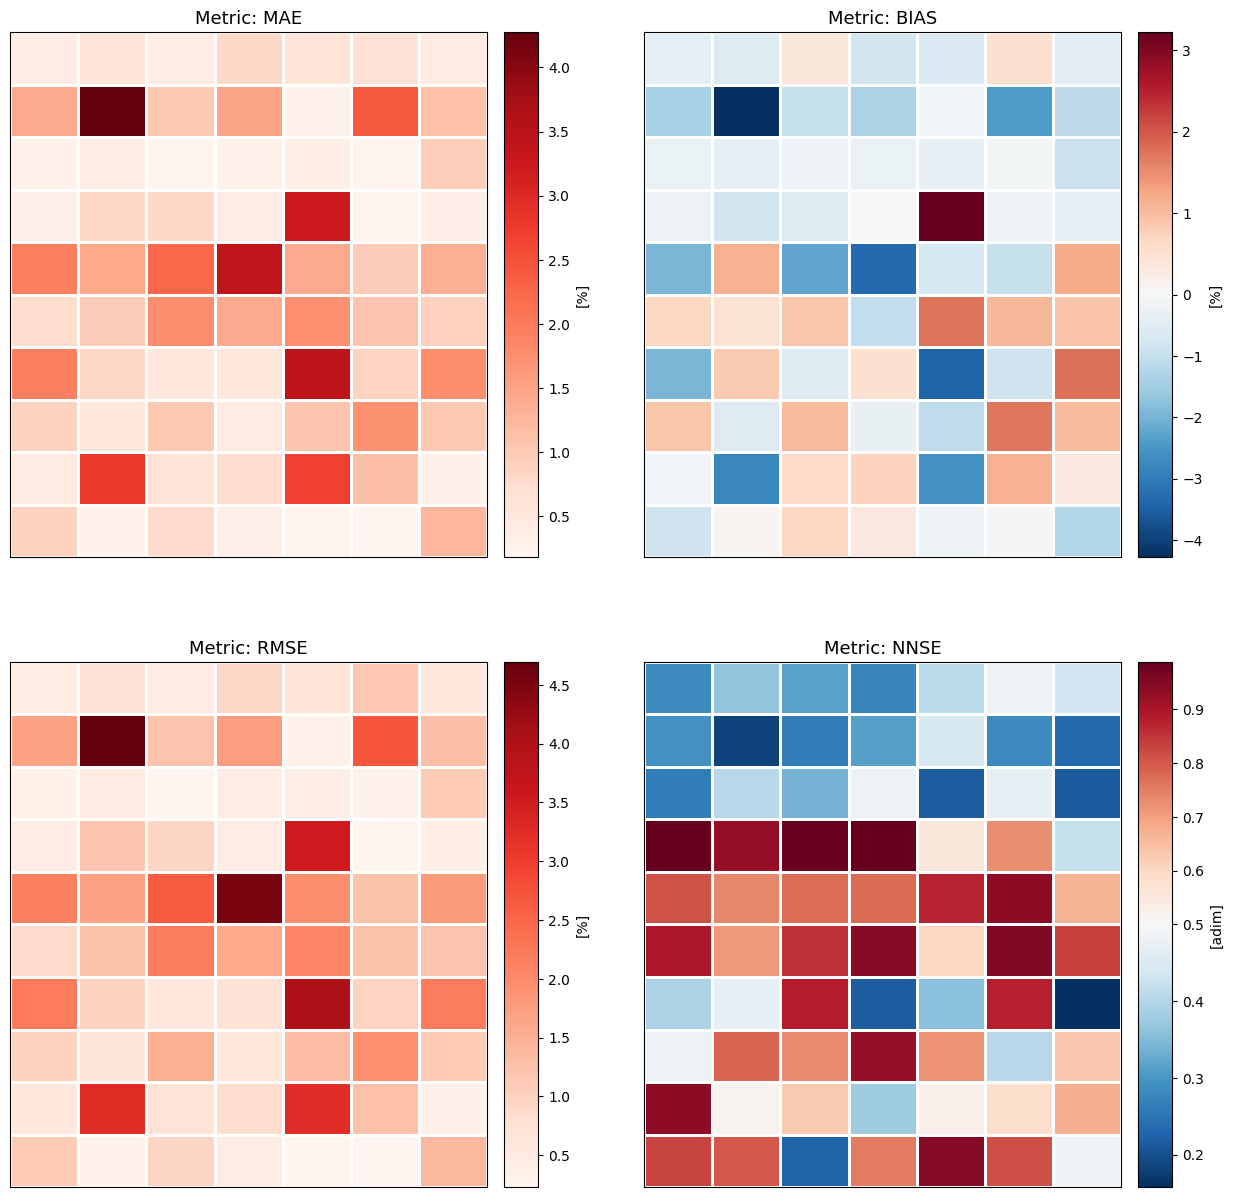

In [22]:
fig_mtx_gof = plot_gof(df_TS_gof_rain, Nrows_grid=10, Ncols_grid=7)
plt.show()

In [23]:
# Best-worst time series
min_mae = df_TS_gof_rain[df_TS_gof_rain.MAE == df_TS_gof_rain.MAE.min()].index.item()
max_mae = df_TS_gof_rain[df_TS_gof_rain.MAE == df_TS_gof_rain.MAE.max()].index.item()
print(f'    - best: {min_mae}')
print(f'    - worst: {max_mae}')

    - best: 5
    - worst: 57


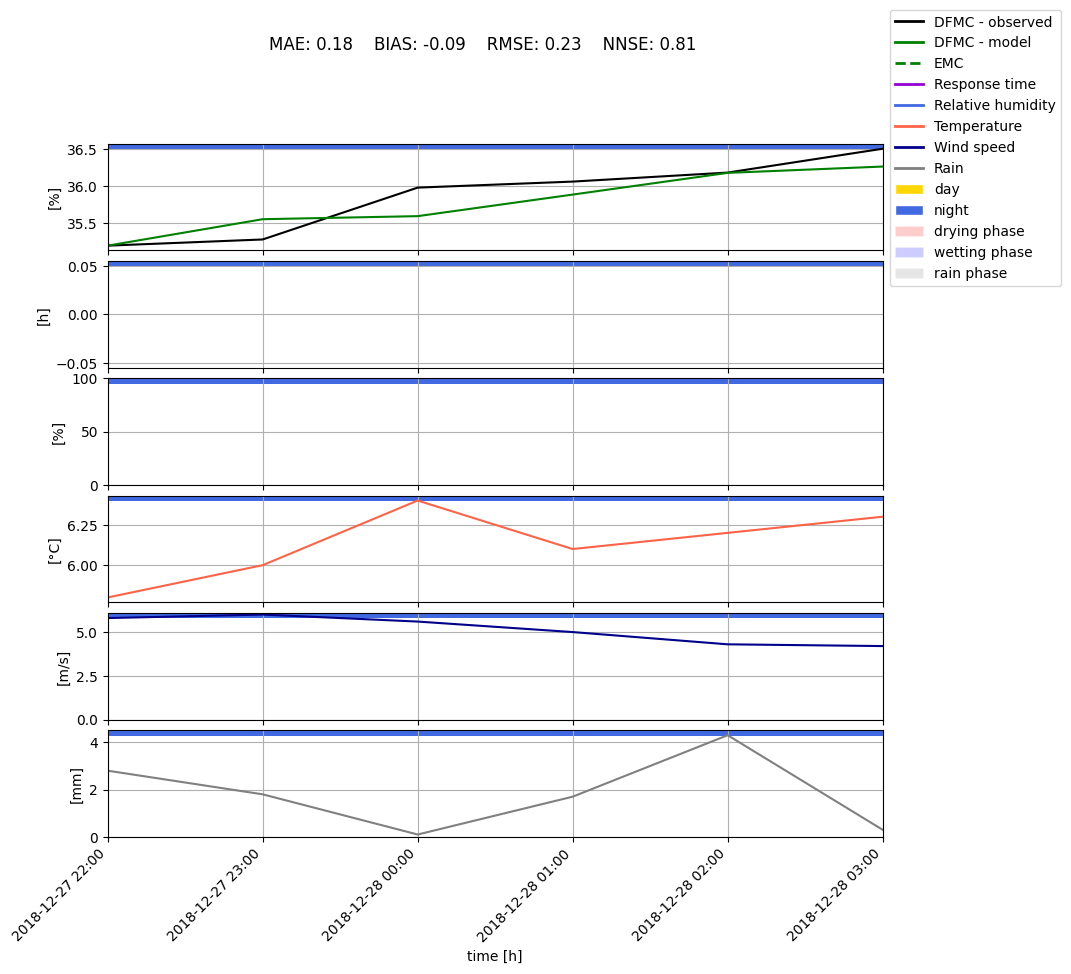

In [24]:
# Worst

idx_TS = 5

mae = df_TS_gof_rain.loc[idx_TS, "MAE"]
bias = df_TS_gof_rain.loc[idx_TS, "BIAS"]
rmse = df_TS_gof_rain.loc[idx_TS, "RMSE"]
nnse = df_TS_gof_rain.loc[idx_TS, "NNSE"]

time_series = pd.concat([
    pd.concat([df_TS_rain_valid.loc[idx_TS, c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof_rain.loc[idx_TS, c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
fig_ts.suptitle(f'MAE: {mae:.2f}    BIAS: {bias:.2f}    RMSE: {rmse:.2f}    NNSE: {nnse:.2f}', y=1)
plt.show()

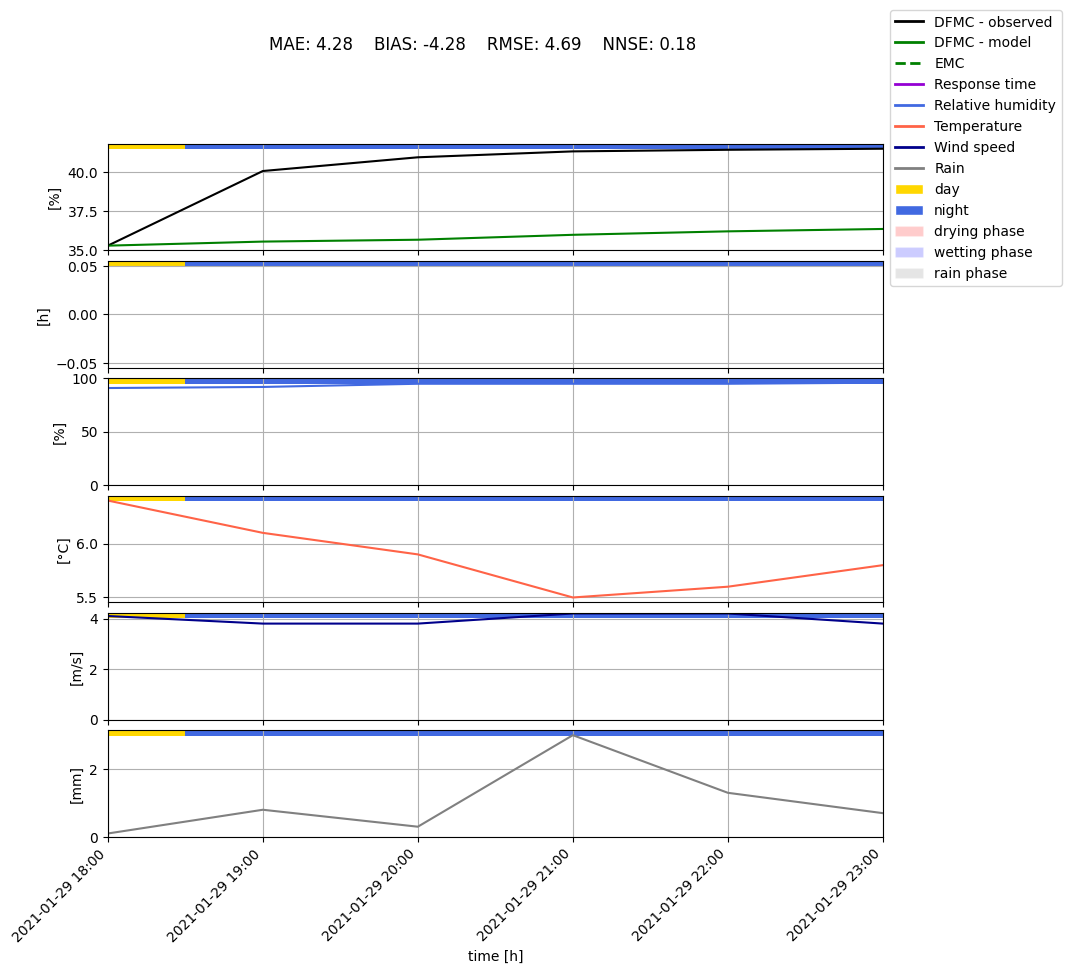

In [25]:
# Worst

idx_TS = 57

mae = df_TS_gof_rain.loc[idx_TS, "MAE"]
bias = df_TS_gof_rain.loc[idx_TS, "BIAS"]
rmse = df_TS_gof_rain.loc[idx_TS, "RMSE"]
nnse = df_TS_gof_rain.loc[idx_TS, "NNSE"]

time_series = pd.concat([
    pd.concat([df_TS_rain_valid.loc[idx_TS, c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof_rain.loc[idx_TS, c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
fig_ts.suptitle(f'MAE: {mae:.2f}    BIAS: {bias:.2f}    RMSE: {rmse:.2f}    NNSE: {nnse:.2f}', y=1)
plt.show()

## Mixed sampling

In [26]:
# CALIBRATED PARAMETERS
X_all = np.load('data_calibration/params_calibration.npz')['params']
params_all = build_params(x=X_all, type_ts='mixed')
params_all

{'A1': np.float64(0.5927894230376204),
 'A2': 0.555,
 'A3': 10.6,
 'A4': 0.5022,
 'A5': 0.0133,
 'Bd1': np.float64(0.11275636149475457),
 'Bd2': np.float64(0.34981970579089056),
 'Bd3': np.float64(0.11105537890515277),
 'Cd1': np.float64(0.5314707152759303),
 'Cd2': np.float64(0.5344001059799594),
 'Cd3': np.float64(0.5177284089999897),
 'Bw1': np.float64(0.10436259734785491),
 'Bw2': np.float64(0.48295449247362854),
 'Bw3': np.float64(0.10006082472140096),
 'Cw1': np.float64(0.5098566245546007),
 'Cw2': np.float64(0.6789002755318204),
 'Cw3': np.float64(0.5048708663988907),
 'MIN_RAIN': 0.1,
 'R1': np.float64(68.65896380497416),
 'R2': np.float64(53.37406687890216),
 'R3': np.float64(0.9359530149554752)}

In [49]:
# LOAD DATA
df_TS_mixed = pd.read_pickle('data_calibration/ISR_dataset/ISR_mixed/TS_validation.pkl')
df_TS_mixed.head()

month  cluster_Kmeans                                               time  \
id                                                                            
0      5               1  0     2017-05-11 10:00:00
1     2017-05-11 11:...   
1      5               1  0     2018-05-14 17:00:00
1     2018-05-14 18:...   
2     11               1  0     2019-11-20 10:00:00
1     2019-11-20 11:...   
3     11               1  0     2017-11-05 13:00:00
1     2017-11-05 14:...   
4      7               1  0     2017-07-31 02:00:00
1     2017-07-31 03:...   

                                                 Rain  \
id                                                      
0   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
1   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
2   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
3   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
4   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   

                                                 Temp  \
id                                                      
0   0      24.5
1      26.1
2      27.1
3      28....   
1   0      23.8
1      22.5
2      20.9
3      19....   
2   0      18.6
1      20.1
2      21.4
3      22....   
3   0      20.1
1      20.5
2      19.1
3      18....   
4   0      18.4
1      17.8
2      17.6
3      17....   

                                               Wspeed  \
id                                                      
0   0      2.1
1      2.3
2      2.2
3      2.4
4 ...   
1   0      4.6
1      3.4
2      2.5
3      2.1
4 ...   
2   0      4.7
1      4.1
2      4.8
3      4.5
4 ...   
3   0      2.7
1      3.6
2      3.3
3      3.1
4 ...   
4   0      0.6
1      0.4
2      0.4
3      0.5
4 ...   

                                                  Hum  \
id                                                      
0   0      62.0
1      55.0
2      48.0
3      32....   
1   0      57.0
1      62.0
2      69.0
3      76....   
2   0       21.0
1       19.0
2       17.0
3      ...   
3   0      62.0
1      60.0
2      64.0
3      62....   
4   0      93.0
1      88.0
2      84.0
3      76....   

                                                 DFMC  
id                                                     
0   0       7.321594
1       7.149489
2       6.97...  
1   0      10.233393
1      10.394265
2      10.71...  
2   0       5.660377
1       5.571294
2       5.48...  
3   0      8.508692
1      7.834101
2      7.57855...  
4   0      11.660777
1      12.280702
2      12.66...

In [28]:
# CLUSTERING

summer = [5, 6, 7, 8, 9, 10]
winter = [1, 2, 3, 4, 11, 12]

def clusters_func(row):
    cl = None
    if row.time.iloc[0].month in winter:
        cl = 1
    elif row.time.iloc[0].month in summer:
        cl = 2
    return cl

# define color palette for the clusters
clusters = [1, 2]
clusters_palette = {
    1: 'green',
    2: 'orange',
}

df_TS_mixed['cluster'] = df_TS_mixed.apply(clusters_func, axis=1)
df_TS_mixed = df_TS_mixed.sort_values(by='cluster')
df_TS_mixed = df_TS_mixed.reset_index(drop=True)
df_TS_mixed.index.name = 'id'
print('Size of the clusters:')
print(df_TS_mixed.groupby('cluster').size())

df_TS_mixed.head()

Size of the clusters:
cluster
1    186
2    222
dtype: int64


month  cluster                                               time  \
id                                                                     
0     11        1  0     2017-11-20 13:00:00
1     2017-11-20 14:...   
1      1        1  0     2018-01-05 15:00:00
1     2018-01-05 16:...   
2     11        1  0     2019-11-20 10:00:00
1     2019-11-20 11:...   
3     11        1  0     2017-11-05 13:00:00
1     2017-11-05 14:...   
4      1        1  0     2020-01-17 14:00:00
1     2020-01-17 15:...   

                                                 Rain  \
id                                                      
0   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
1   0      1.6
1      0.7
2      1.9
3      5.0
4 ...   
2   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
3   0      0.0
1      0.0
2      0.0
3      0.0
4 ...   
4   0      0.0
1      0.1
2      1.0
3      1.6
4 ...   

                                                 Temp  \
id                                                      
0   0      18.7
1      19.6
2      18.0
3      16....   
1   0       9.7
1       9.7
2      10.0
3      10....   
2   0      18.6
1      20.1
2      21.4
3      22....   
3   0      20.1
1      20.5
2      19.1
3      18....   
4   0      8.2
1      7.7
2      6.8
3      5.7
4 ...   

                                               Wspeed  \
id                                                      
0   0      3.1
1      3.3
2      4.0
3      4.0
4 ...   
1   0      6.0
1      5.2
2      6.7
3      4.0
4 ...   
2   0      4.7
1      4.1
2      4.8
3      4.5
4 ...   
3   0      2.7
1      3.6
2      3.3
3      3.1
4 ...   
4   0      2.4
1      1.9
2      2.1
3      4.3
4 ...   

                                                  Hum  \
id                                                      
0   0      53.0
1      48.0
2      61.0
3      67....   
1   0      98.0
1      97.0
2      97.0
3      99....   
2   0       21.0
1       19.0
2       17.0
3      ...   
3   0      62.0
1      60.0
2      64.0
3      62....   
4   0      68.0
1      72.0
2      82.0
3      87....   

                                                 DFMC  
id                                                     
0   0       8.340972
1       7.918969
2       7.57...  
1   0      36.183791
1      36.427209
2      36.74...  
2   0       5.660377
1       5.571294
2       5.48...  
3   0      8.508692
1      7.834101
2      7.57855...  
4   0      12.357581
1      13.867356
2      24.01...

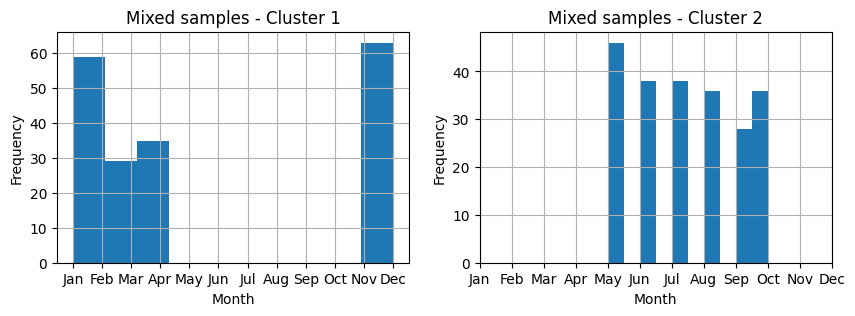

In [29]:
# Distribution of month PER CLUSTER
num_clusters = len(clusters)
fig, axs = plt.subplots(ncols=num_clusters, nrows=1, figsize=(5*num_clusters, 3))
for i, cl in enumerate(clusters):
    ax = axs[i]
    df_TS_mixed[df_TS_mixed.cluster==cl].month.plot.hist(ax=ax)
    ax.set_xlabel('Month')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.grid()
    ax.set_title('Mixed samples - Cluster {}'.format(cl))
plt.show()

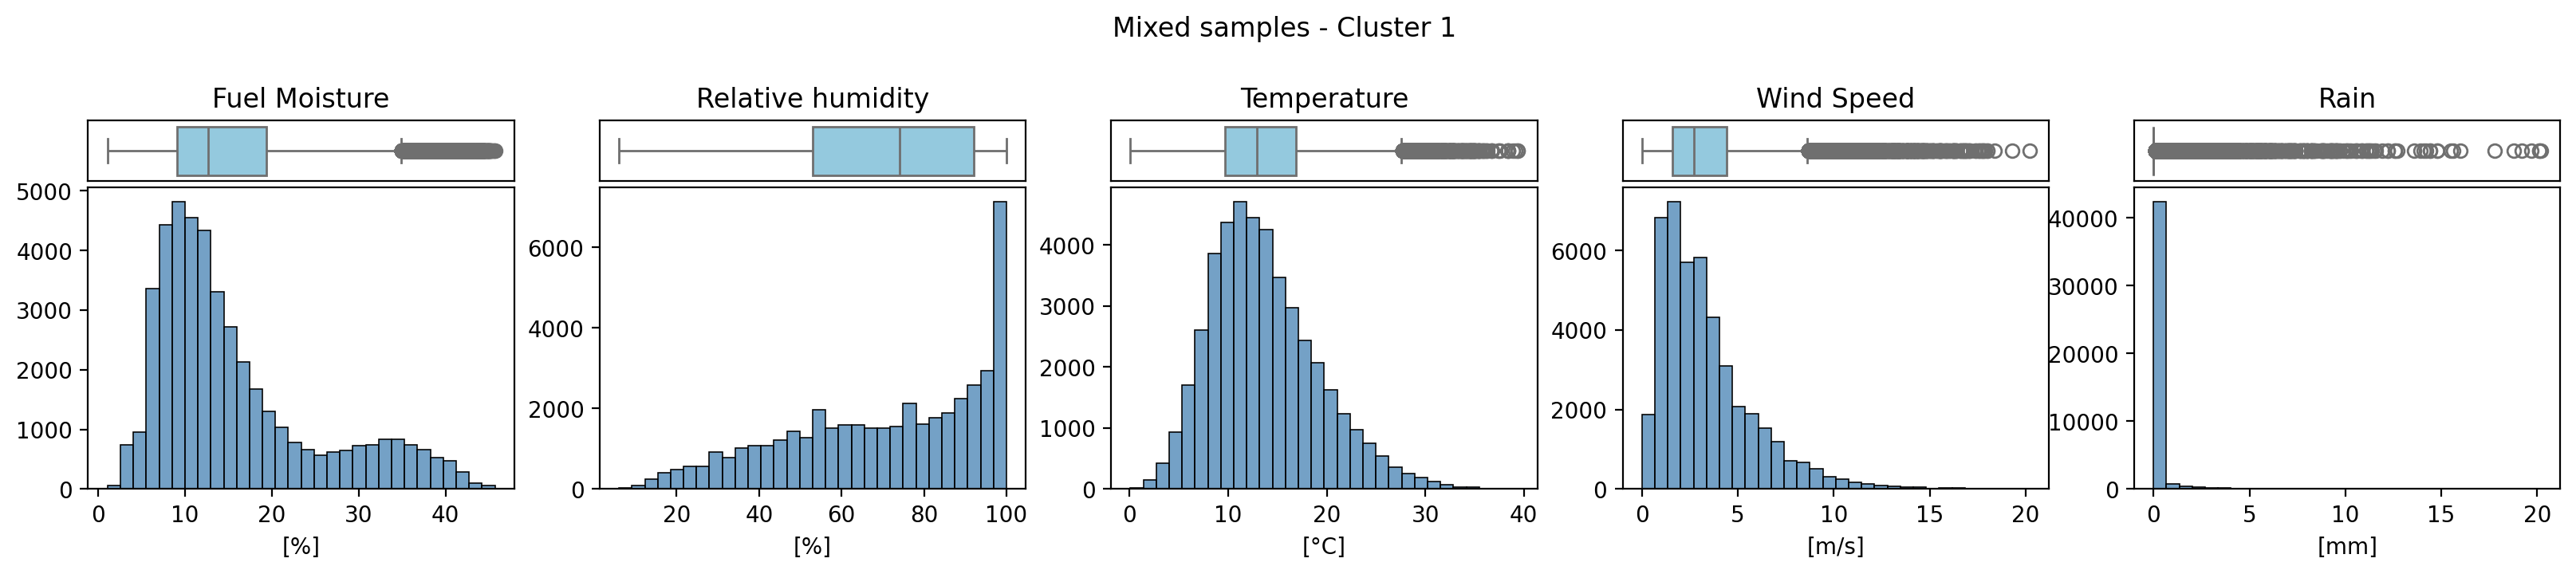

             mean        std       min        max
DFMC    15.784925   9.444625  1.088032  45.681695
Hum     70.528405  23.748599       6.0      100.0
Temp     13.66741    5.49448       0.1       39.4
Wspeed   3.342686   2.422384       0.0       20.2
Rain     0.144666   0.786304       0.0       20.2


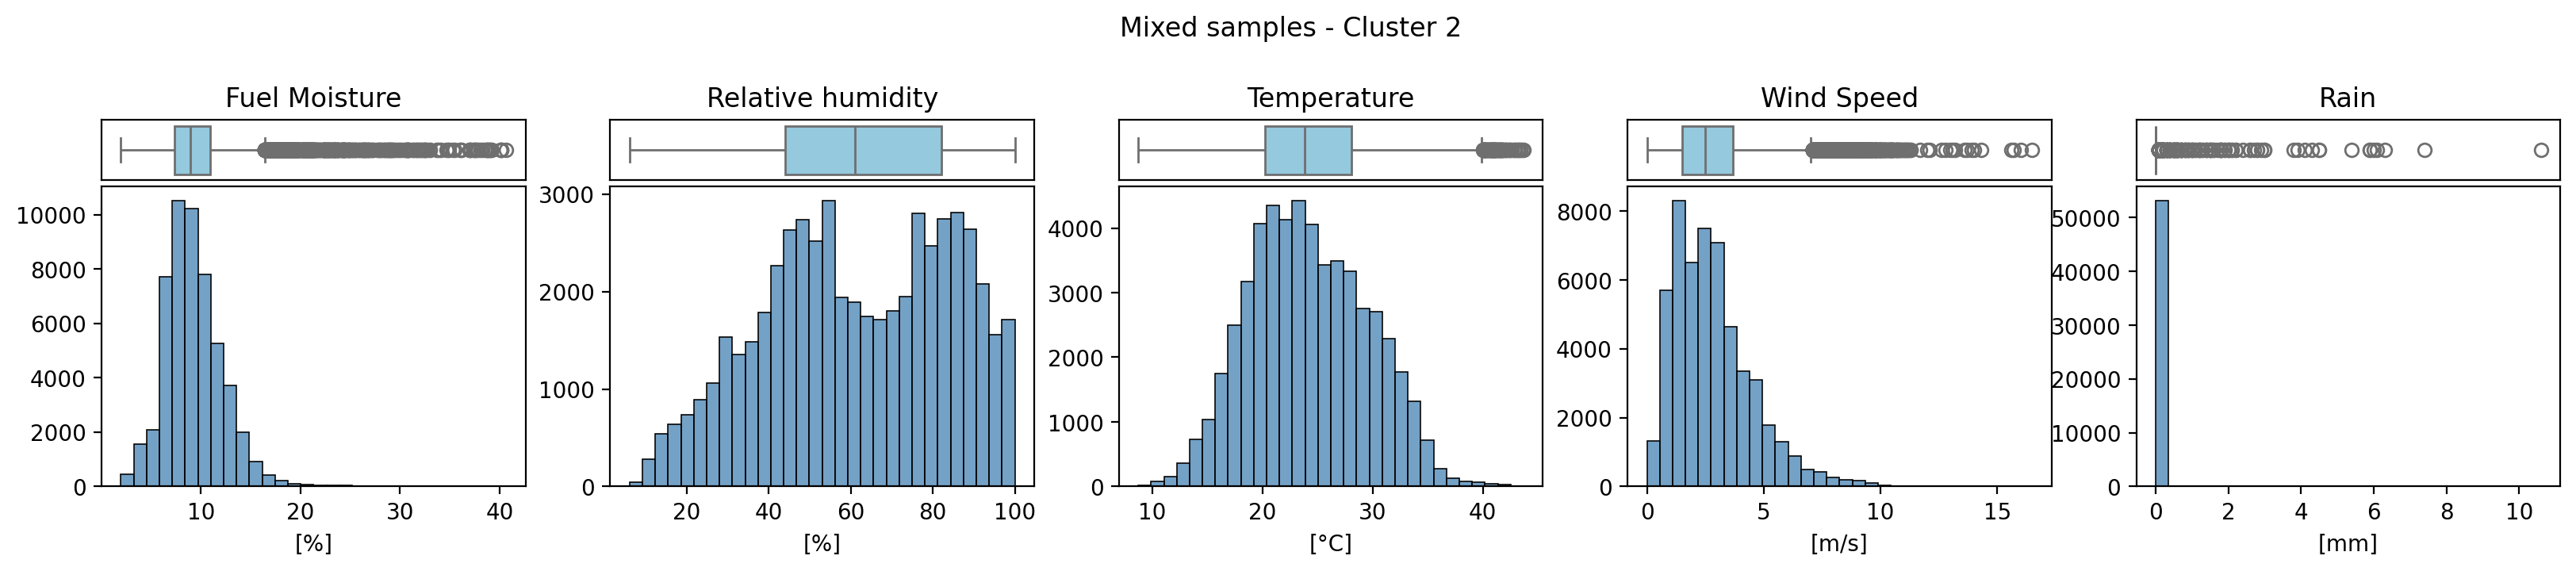

             mean        std       min        max
DFMC     9.295536   3.046282  1.960784  40.652819
Hum     61.511242  22.608523       6.0      100.0
Temp    24.184433   5.354745       8.7       43.7
Wspeed   2.810792   1.708281       0.0       16.5
Rain     0.003765   0.111615       0.0       10.6


In [30]:
# Pot distribution of data PER CLUSTER

variables = ['DFMC', 'Hum', 'Temp', 'Wspeed', 'Rain']
vars_name = ['Fuel Moisture', 'Relative humidity', 'Temperature', 'Wind Speed', 'Rain']
vars_um = ['%', '%', '°C', 'm/s', 'mm']

num_vars = len(variables)
num_clusters = len(clusters)

for cl in clusters:
    fig, axs = plt.subplots(1, num_vars,
                           figsize=(num_vars*4, 3),
                           dpi=200)
    df_stats = pd.DataFrame(index=variables, columns=['mean', 'std', 'min', 'max'])
    for i, var in enumerate(variables):
        df_selection = df_TS_mixed[df_TS_mixed.cluster==cl]
        df_plot = pd.concat([df_selection.iloc[x][var] for x in range(len(df_selection))])
        df_stats.loc[var] = [df_plot.mean(), df_plot.std(), df_plot.min(), df_plot.max()]
        ax = axs[i]
        ax_divider = make_axes_locatable(ax)
        cax = ax_divider.append_axes('top', size='20%', pad='2%')

        sns.boxplot(df_plot, ax=cax, color='skyblue', orient='h')
        sns.histplot(df_plot, ax=ax, bins=30, kde=False, color='steelblue')

        cax.set(xlabel='', ylabel='', yticks=[], xticks=[], title=vars_name[i])
        ax.set(xlabel=f'[{vars_um[i]}]', ylabel='')
    fig.suptitle(f'Mixed samples - Cluster {cl}', y=1.1)
    plt.show()
    print(df_stats)

In [31]:
# EVALUATION GoF
df_TS_gof_mixed = evaluate_model(X=X_all, df_TS=df_TS_mixed, type_ts='mixed')

In [32]:
# GoF statistics
# for all and for the three clusters

metrics = ['MAE', 'BIAS', 'RMSE', 'NNSE']
stats = ['median', 'min', 'max']

df_stats = pd.DataFrame(index=stats)
for mm in metrics:
    df_stats.loc['median', mm] = df_TS_gof_mixed[mm].median()
    df_stats.loc['min', mm] = df_TS_gof_mixed[mm].min()
    df_stats.loc['max', mm] = df_TS_gof_mixed[mm].max()

for cl in df_TS_mixed.cluster.unique():
    for mm in metrics:
        df_stats.loc['median', f'{mm}_{cl}'] = df_TS_gof_mixed[df_TS_mixed.cluster==cl][mm].median()
        df_stats.loc['min', f'{mm}_{cl}'] = df_TS_gof_mixed[df_TS_mixed.cluster==cl][mm].min()
        df_stats.loc['max', f'{mm}_{cl}'] = df_TS_gof_mixed[df_TS_mixed.cluster==cl][mm].max()
df_stats

MAE      BIAS      RMSE      NNSE     MAE_1    BIAS_1    RMSE_1  \
median  1.840886 -0.024240  2.287523  0.654388  2.596692  0.834688  3.276298   
min     0.467671 -6.252725  0.543999  0.062491  0.467671 -6.252725  0.543999   
max     7.216044  7.216044  7.635164  0.980232  7.216044  7.216044  7.635164   

          NNSE_1     MAE_2    BIAS_2    RMSE_2    NNSE_2  
median  0.787269  1.490514 -0.731484  1.770854  0.562765  
min     0.113637  0.479226 -4.165279  0.641238  0.062491  
max     0.980232  4.233943  4.123245  5.348201  0.934256

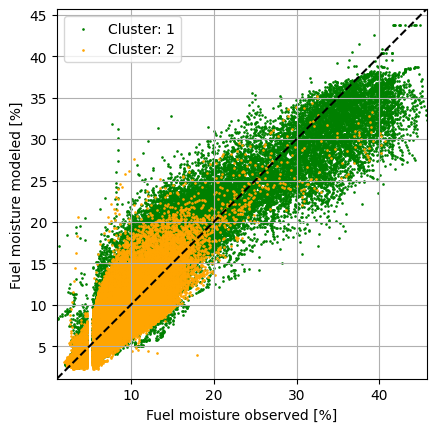

In [33]:
fig_points = plot_points(df_TS_mixed, df_TS_gof_mixed, clusters=clusters_palette)
plt.show()

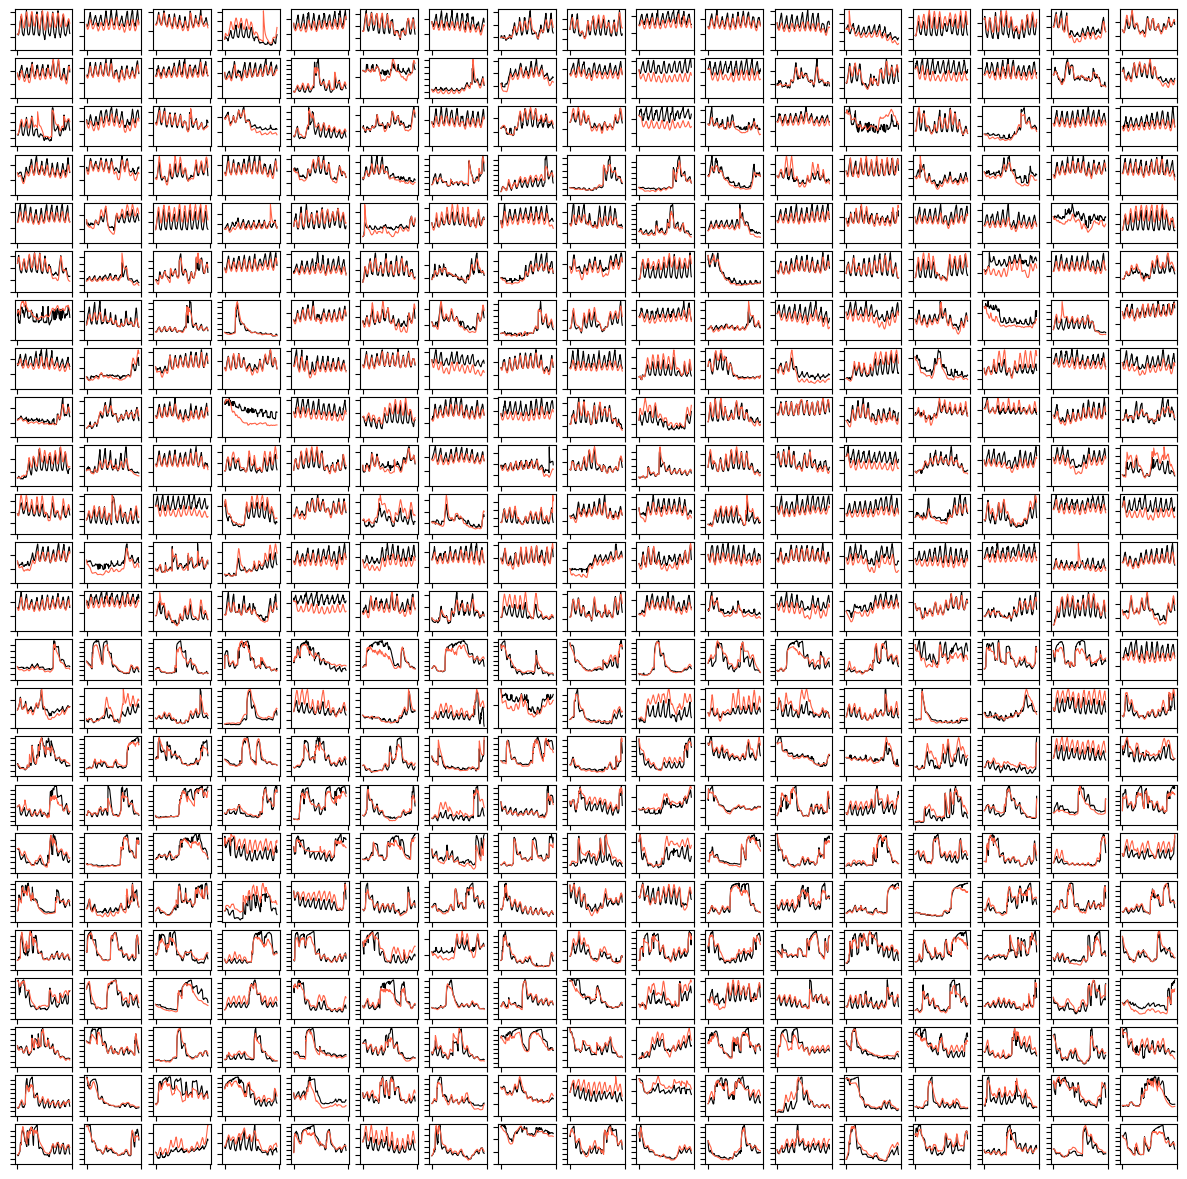

In [34]:
fig_mtx_TS = matrix_TS(df_TS_mixed, df_TS_gof_mixed)
plt.show()

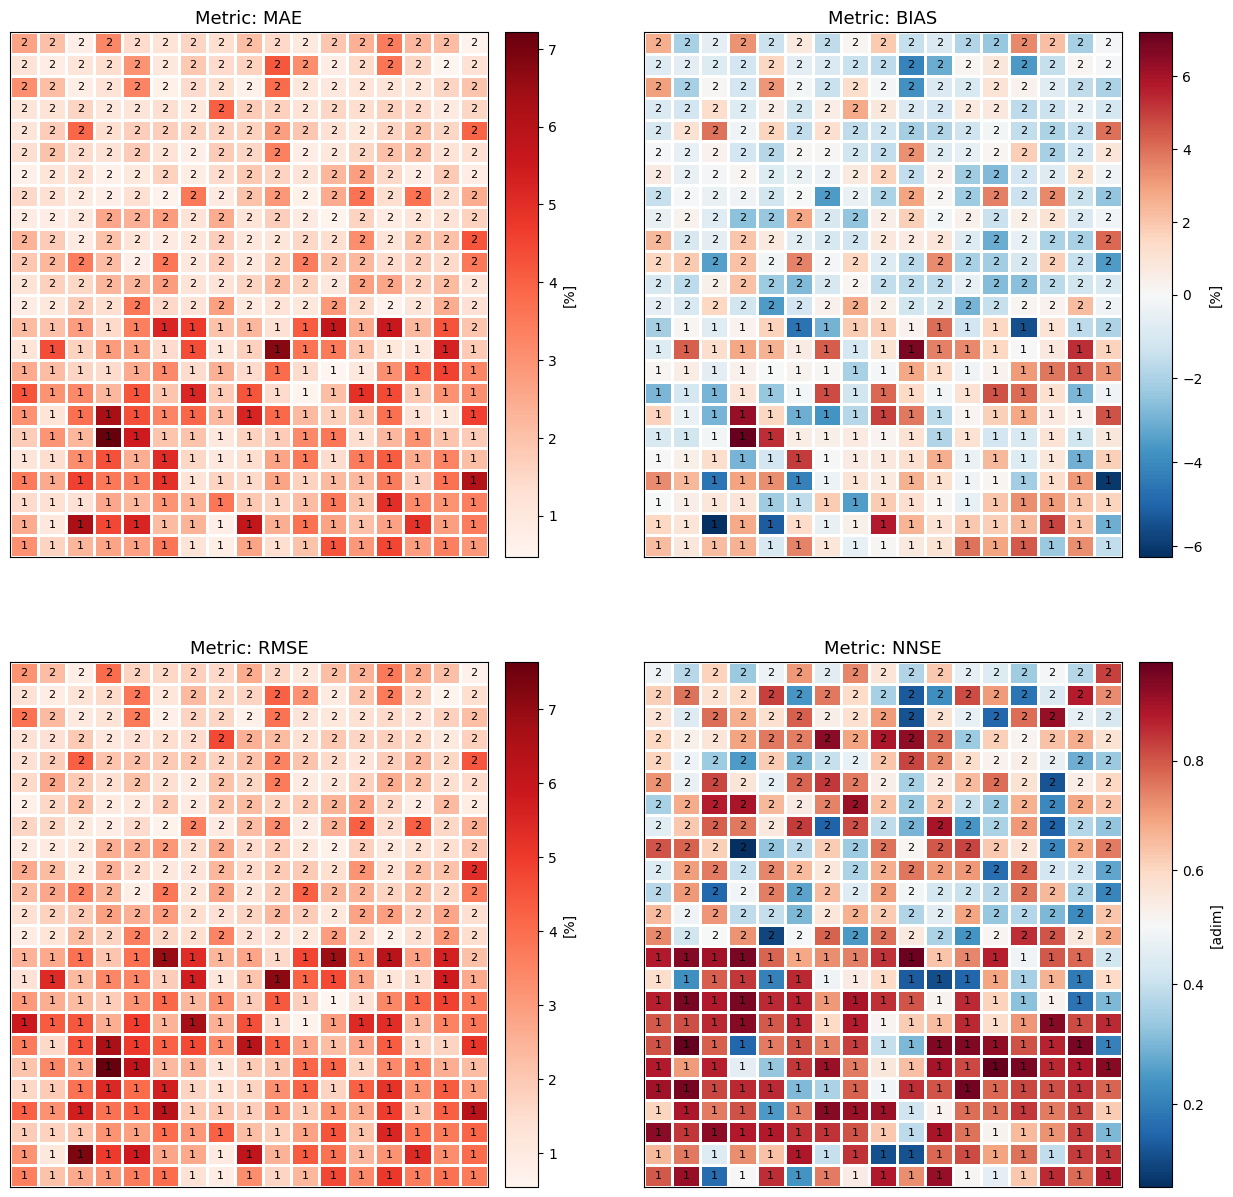

In [35]:
fig_mtx_gof = plot_gof(df_TS_gof_mixed, labels=df_TS_mixed.cluster.values)
plt.show()

In [36]:
# Best-worst time series per cluster
for cl in df_TS_mixed.cluster.unique():
    selection = df_TS_gof_mixed.loc[df_TS_mixed['cluster'] == cl]
    min_mae = selection[selection.MAE == selection.MAE.min()].index.item()
    max_mae = selection[selection.MAE == selection.MAE.max()].index.item()
    print(f'Cluster {cl}')
    print(f'    - best: {min_mae}')
    print(f'    - worst: {max_mae}')

Cluster 1
    - best: 147
    - worst: 88
Cluster 2
    - best: 389
    - worst: 254


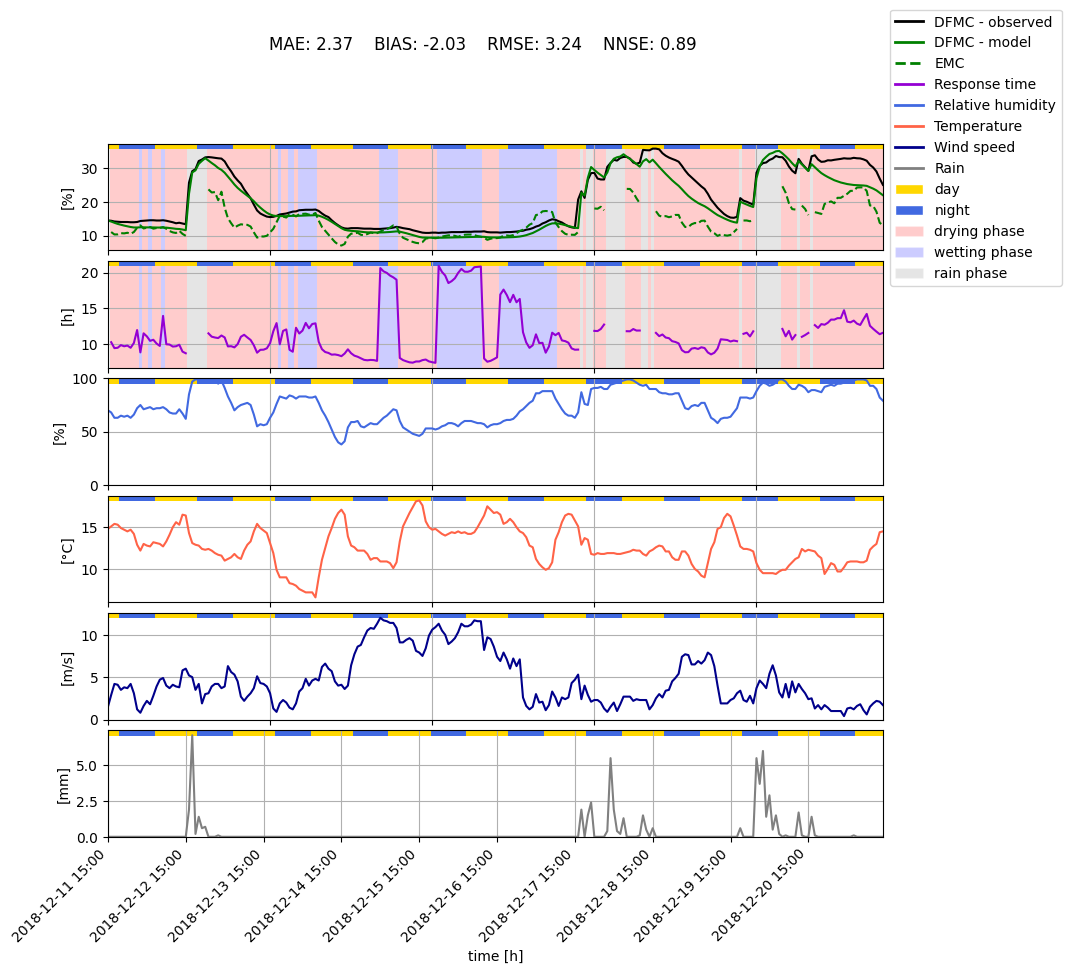

In [37]:
# Plot single time series
# Cluster 1 - min MAE

idx_TS = 143

mae = df_TS_gof_mixed.loc[idx_TS, "MAE"]
bias = df_TS_gof_mixed.loc[idx_TS, "BIAS"]
rmse = df_TS_gof_mixed.loc[idx_TS, "RMSE"]
nnse = df_TS_gof_mixed.loc[idx_TS, "NNSE"]

time_series = pd.concat([
    pd.concat([df_TS_mixed.loc[idx_TS, c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof_mixed.loc[idx_TS, c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
fig_ts.suptitle(f'MAE: {mae:.2f}    BIAS: {bias:.2f}    RMSE: {rmse:.2f}    NNSE: {nnse:.2f}', y=1)
plt.show()

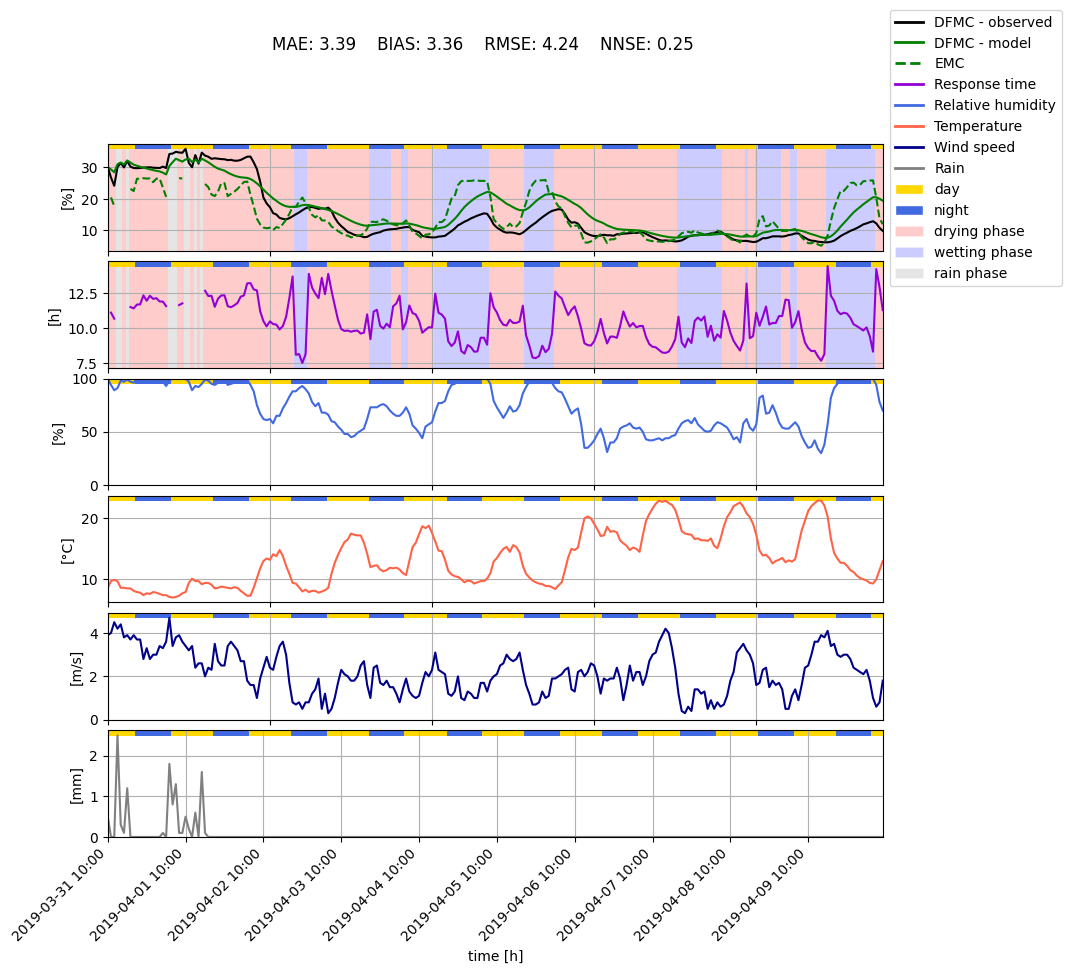

In [38]:
# Plot single time series
# Cluster 1 - max MAE

idx_TS = 55

mae = df_TS_gof_mixed.loc[idx_TS, "MAE"]
bias = df_TS_gof_mixed.loc[idx_TS, "BIAS"]
rmse = df_TS_gof_mixed.loc[idx_TS, "RMSE"]
nnse = df_TS_gof_mixed.loc[idx_TS, "NNSE"]

time_series = pd.concat([
    pd.concat([df_TS_mixed.loc[idx_TS, c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof_mixed.loc[idx_TS, c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
fig_ts.suptitle(f'MAE: {mae:.2f}    BIAS: {bias:.2f}    RMSE: {rmse:.2f}    NNSE: {nnse:.2f}', y=1)
plt.show()

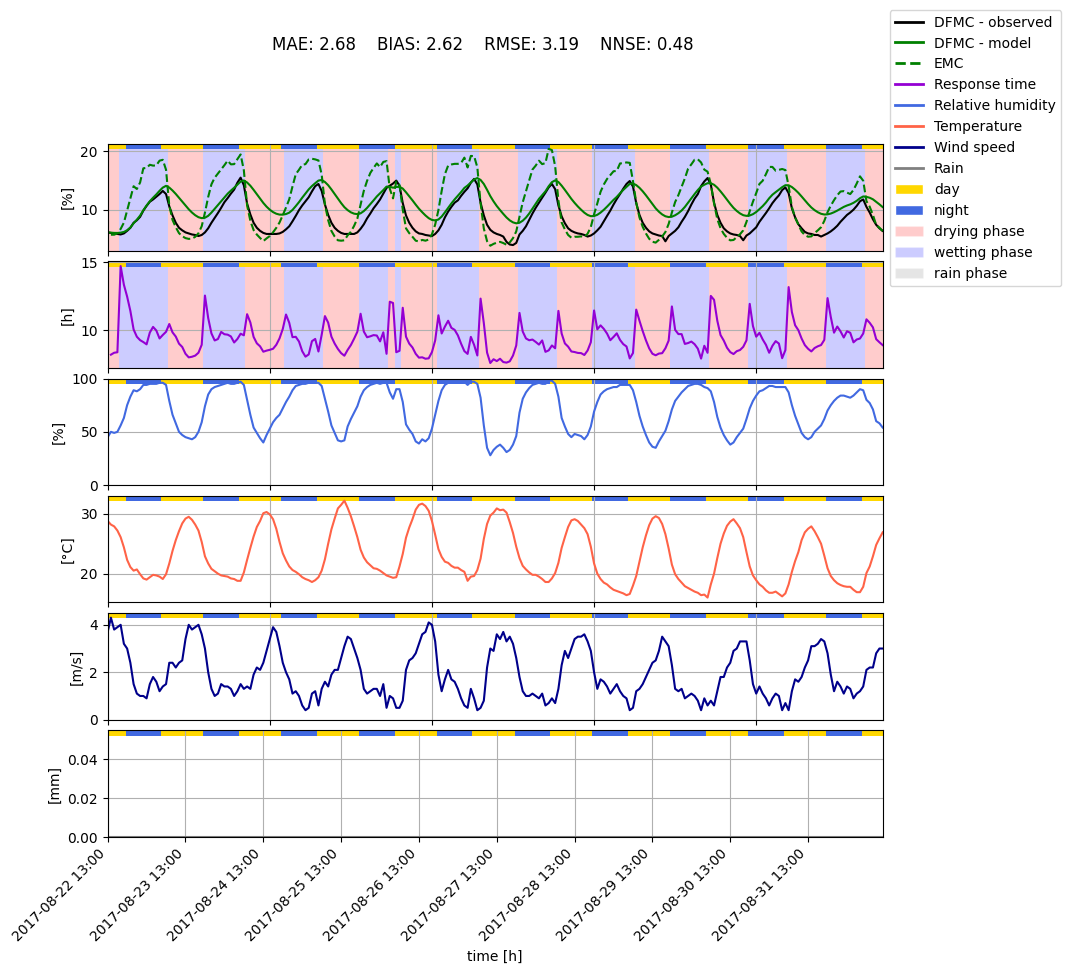

In [39]:
# Plot single time series
# Cluster 2 - min MAE

idx_TS = 391

mae = df_TS_gof_mixed.loc[idx_TS, "MAE"]
bias = df_TS_gof_mixed.loc[idx_TS, "BIAS"]
rmse = df_TS_gof_mixed.loc[idx_TS, "RMSE"]
nnse = df_TS_gof_mixed.loc[idx_TS, "NNSE"]

time_series = pd.concat([
    pd.concat([df_TS_mixed.loc[idx_TS, c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof_mixed.loc[idx_TS, c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
fig_ts.suptitle(f'MAE: {mae:.2f}    BIAS: {bias:.2f}    RMSE: {rmse:.2f}    NNSE: {nnse:.2f}', y=1)
plt.show()

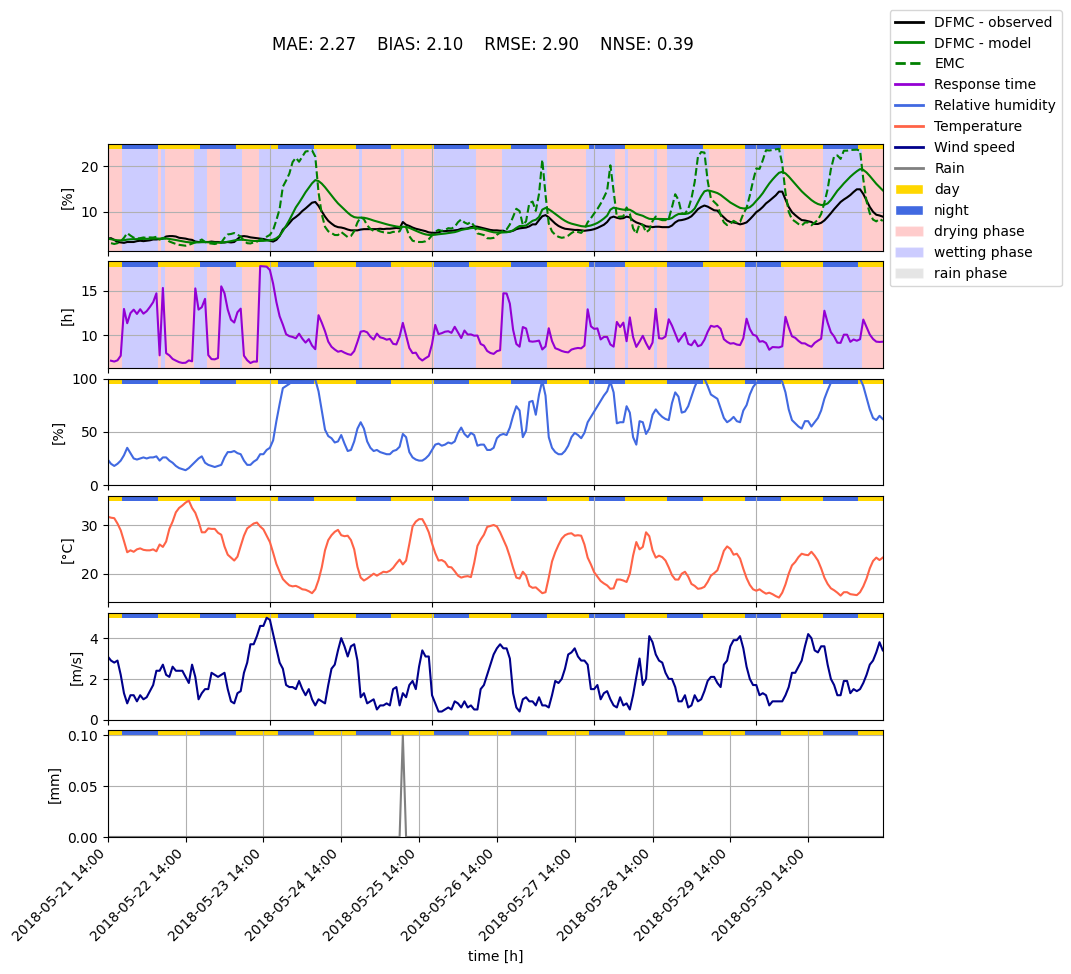

In [40]:
# Plot single time series
# Cluster 2 - max MAE

idx_TS = 207

mae = df_TS_gof_mixed.loc[idx_TS, "MAE"]
bias = df_TS_gof_mixed.loc[idx_TS, "BIAS"]
rmse = df_TS_gof_mixed.loc[idx_TS, "RMSE"]
nnse = df_TS_gof_mixed.loc[idx_TS, "NNSE"]

time_series = pd.concat([
    pd.concat([df_TS_mixed.loc[idx_TS, c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof_mixed.loc[idx_TS, c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
fig_ts.suptitle(f'MAE: {mae:.2f}    BIAS: {bias:.2f}    RMSE: {rmse:.2f}    NNSE: {nnse:.2f}', y=1)
plt.show()

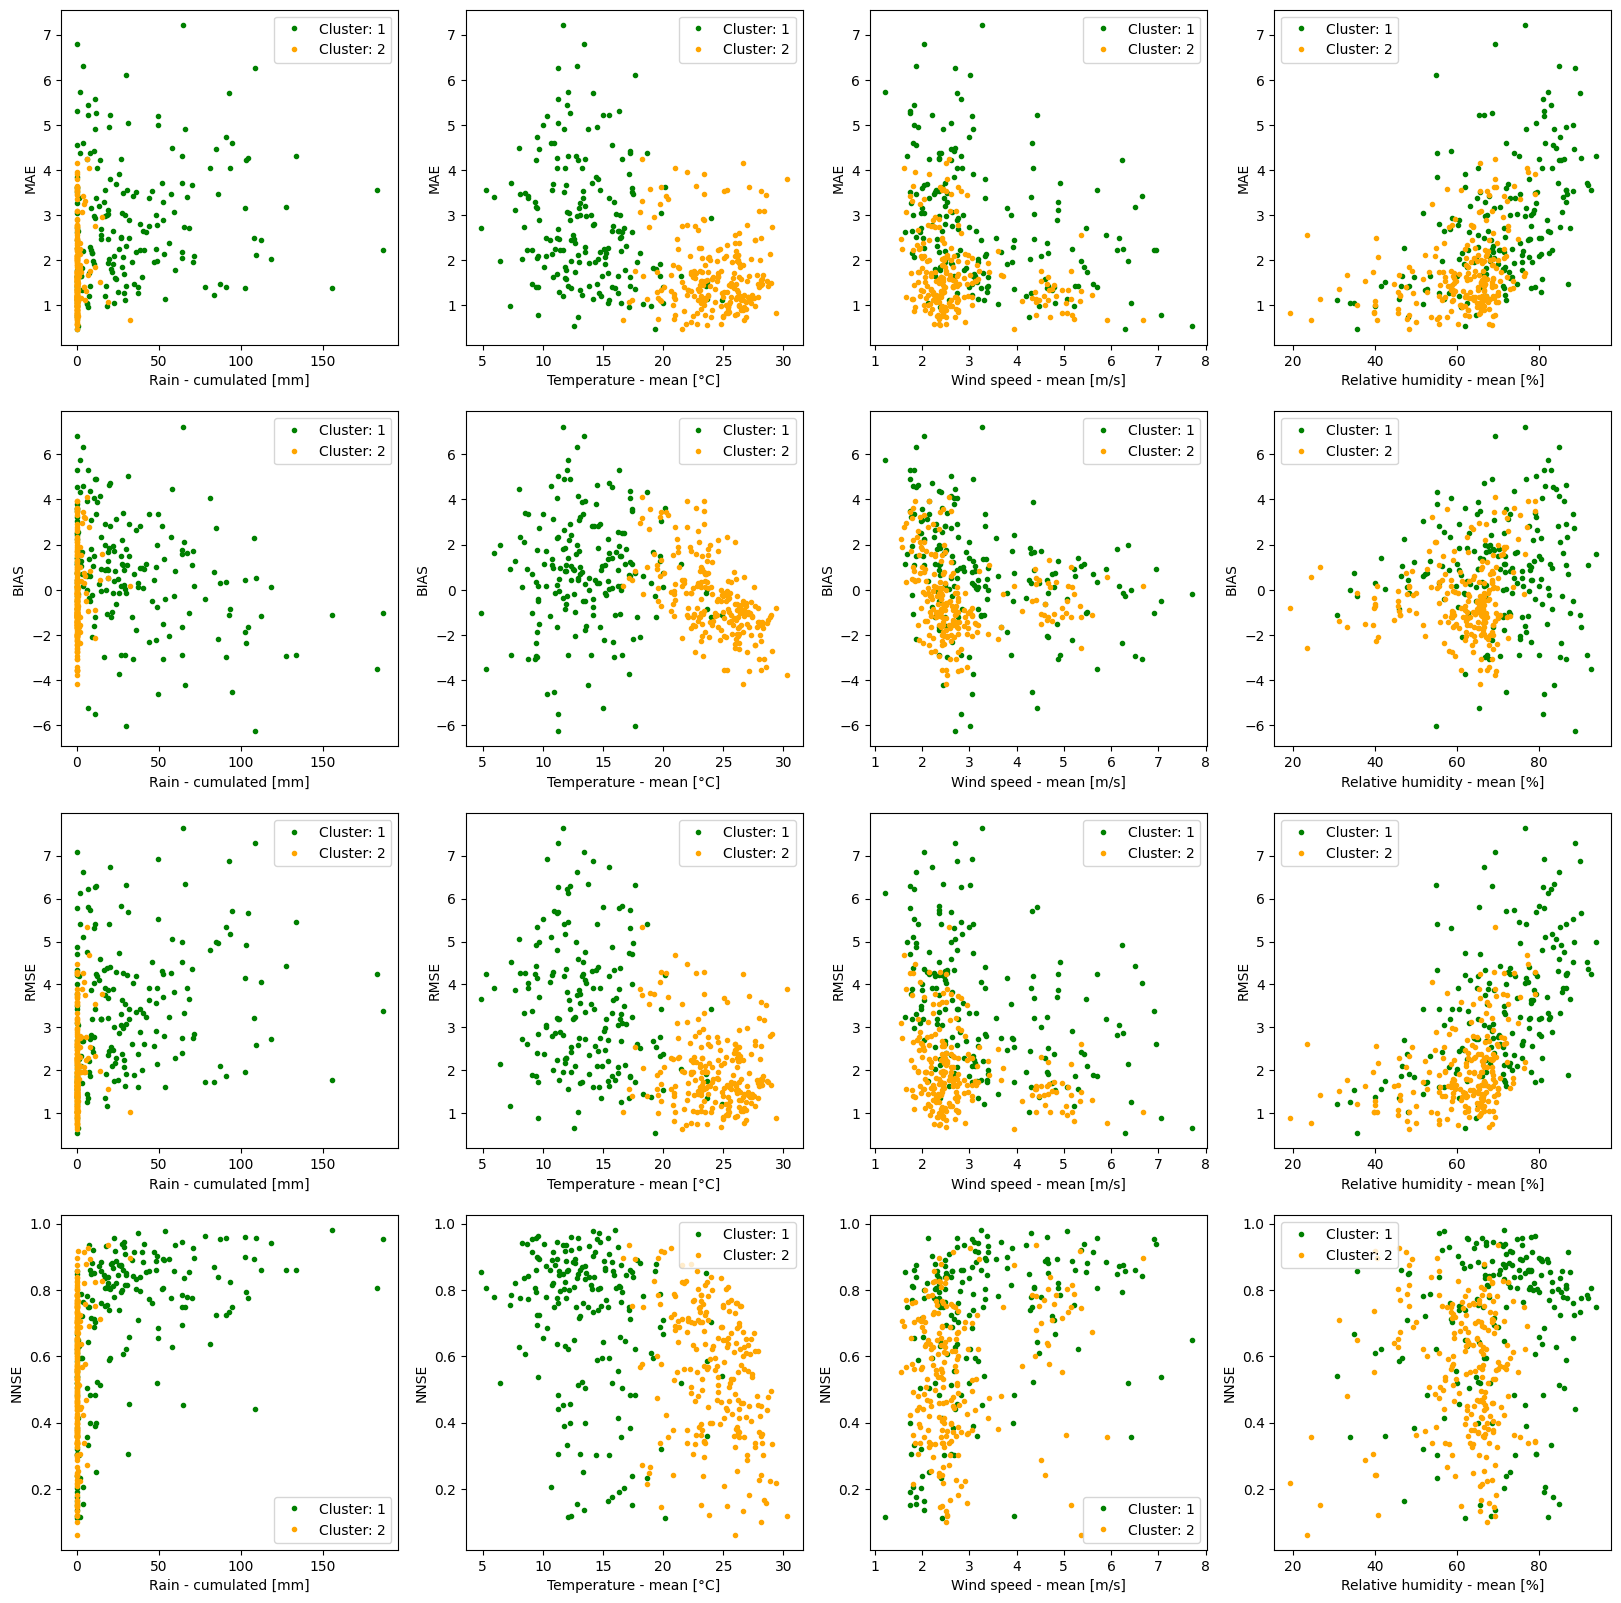

In [45]:
# Analysis of the clusters and relative errors

df_TS_mean = pd.concat(
    [
        df_TS_mixed.Rain.apply(lambda x: x.sum()).rename('Rain_sum'),
        df_TS_mixed.Temp.apply(lambda x: x.mean()).rename('Temp_mean'), 
        df_TS_mixed.Wspeed.apply(lambda x: x.mean()).rename('Wspeed_mean'),
        df_TS_mixed.Hum.apply(lambda x: x.mean()).rename('Hum_mean'),
    ],
    axis=1
)
df_analysis = pd.concat(
    [
        df_TS_mixed.cluster,
        df_TS_mean,
        df_TS_gof_mixed.MAE,
        df_TS_gof_mixed.BIAS,
        df_TS_gof_mixed.RMSE,
        df_TS_gof_mixed.NNSE,
    ],
    axis=1
)

values_x = ['Rain_sum', 'Temp_mean', 'Wspeed_mean', 'Hum_mean']
labels_x = ['Rain - cumulated [mm]', 'Temperature - mean [°C]', 'Wind speed - mean [m/s]', 'Relative humidity - mean [%]']
values_y = ['MAE', 'BIAS', 'RMSE', 'NNSE']

fig, ax = plt.subplots(len(values_x), len(values_y), figsize=(20, 20))
for r, y in enumerate(values_y):
    for c, x in enumerate(values_x):
        for cl, color in clusters_palette.items():
            df_analysis_cl = df_analysis[df_analysis.cluster==cl]
            x_vals = df_analysis_cl[x].values
            y_vals = df_analysis_cl[y].values
            ax[r, c].plot(x_vals, y_vals, 'o', color=color, markersize=3, label=f'Cluster: {cl}')
        ax[r, c].set_xlabel(labels_x[c])
        ax[r, c].set_ylabel(y)
        ax[r, c].legend()
        # x_vals_all = df_analysis[x].values
        # y_vals_all = df_analysis[y].values
        # rpearson, _ = pearsonr(x_vals_all, y_vals_all)
        # ax[r, c].set_title(f'Pearson r = {rpearson:.2f}')
plt.show()

# **BC Dataset**

## BC1

In [ ]:
# Optimized paramteres
X = np.load('data_calibration/params_calibration.npz')['params']

In [ ]:
# Load data
df_TS_bc1 = pd.read_pickle('data_calibration/BC_dataset/BC1.pkl')
df_TS_bc1.head()

In [ ]:
# Distribution of data

variables = ['DFMC', 'Hum', 'Temp', 'Wspeed', 'Rain']
vars_name = ['Fuel Moisture', 'Relative humidity', 'Temperature', 'Wind Speed', 'Rain']
vars_um = ['%', '%', '°C', 'm/s', 'mm']

num_vars = len(variables)
fig, axs = plt.subplots(1, num_vars,
                       figsize=(num_vars*4, 3),
                       dpi=200)

df_stats = pd.DataFrame(index=variables, columns=['mean', 'std', 'min', 'max'])
for i, var in enumerate(variables):
    df_plot = pd.concat([df_TS_bc1.iloc[x][var] for x in range(len(df_TS_bc1))])
    df_stats.loc[var] = [df_plot.mean(), df_plot.std(), df_plot.min(), df_plot.max()]

    ax = axs[i]
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes('top', size='20%', pad='2%')

    sns.boxplot(df_plot, ax=cax, color='skyblue', orient='h')
    sns.histplot(df_plot, ax=ax, bins=30, kde=False, color='steelblue')

    cax.set(xlabel='', ylabel='', yticks=[], xticks=[], title=vars_name[i])
    ax.set(xlabel=f'[{vars_um[i]}]', ylabel='')
fig.suptitle('BC1', y=1.1)
plt.show()
df_stats

In [ ]:
df_TS_gof_bc1 = evaluate_model(X=X, df_TS=df_TS_bc1, type_ts='mixed')
# GoF measures
df_TS_gof_bc1

In [ ]:
# Plot single time series
time_series = pd.concat([
    pd.concat([df_TS_bc1.iloc[0][c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof_bc1.iloc[0][c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
plt.show()

## BC2

In [55]:
# Calibrated parameters
X = np.load('data_calibration/params_calibration.npz')['params']

In [ ]:
# Load data
df_TS_bc2 = pd.read_pickle('data_calibration/BC_dataset/BC2.pkl')
df_TS_bc2.head()

In [ ]:
# Distribution of data

variables = ['DFMC', 'Hum', 'Temp', 'Wspeed', 'Rain']
vars_name = ['Fuel Moisture', 'Relative humidity', 'Temperature', 'Wind Speed', 'Rain']
vars_um = ['%', '%', '°C', 'm/s', 'mm']

num_vars = len(variables)
fig, axs = plt.subplots(1, num_vars,
                       figsize=(num_vars*4, 3),
                       dpi=200)

df_stats = pd.DataFrame(index=variables, columns=['mean', 'std', 'min', 'max'])
for i, var in enumerate(variables):
    df_plot = pd.concat([df_TS_bc2.iloc[x][var] for x in range(len(df_TS_bc2))])
    df_stats.loc[var] = [df_plot.mean(), df_plot.std(), df_plot.min(), df_plot.max()]

    ax = axs[i]
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes('top', size='20%', pad='2%')

    sns.boxplot(df_plot, ax=cax, color='skyblue', orient='h')
    sns.histplot(df_plot, ax=ax, bins=30, kde=False, color='steelblue')

    cax.set(xlabel='', ylabel='', yticks=[], xticks=[], title=vars_name[i])
    ax.set(xlabel=f'[{vars_um[i]}]', ylabel='')
fig.suptitle('BC2', y=1.1)
plt.show()
df_stats

In [ ]:
df_TS_gof_bc2 = evaluate_model(X=X, df_TS=df_TS_bc2, type_ts='mixed')
# GoF measures
df_TS_gof_bc2

In [ ]:
# Plot single time series
time_series = pd.concat([
    pd.concat([df_TS_bc2.iloc[0][c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof_bc2.iloc[0][c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
plt.show()